# Codigo Aplicado para el proyecto de DATA MINING

#Fuente de los datos: 
- Medio: Kaggle 
- user: Pralabh Poudel ·
- URL: https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption
- Tema: World Energy Consumption


In [2]:
#cargamos las librerías necesarias
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
#estándarizadores
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import numpy as np
import warnings
warnings.filterwarnings('ignore')
#colocar predeterminado los resultados numéricos en 2 decimales 
pd.set_option('display.float_format','{:.2f}'.format)


In [3]:
#cargado de datos
df=pd.read_excel('World Energy Consumption.xlsx', sheet_name='World Energy Consumption')
df

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22007,Zimbabwe,2018,ZWE,15052191.00,22715353088.00,NaN,NaN,NaN,NaN,25.91,...,0.22,NaN,NaN,NaN,NaN,0.00,0.00,NaN,0.00,NaN
22008,Zimbabwe,2019,ZWE,15354606.00,NaN,NaN,NaN,NaN,NaN,24.75,...,0.36,NaN,NaN,NaN,NaN,0.00,0.00,NaN,0.00,NaN
22009,Zimbabwe,2020,ZWE,15669663.00,NaN,NaN,NaN,NaN,NaN,22.34,...,0.40,NaN,NaN,NaN,NaN,0.00,0.00,NaN,0.00,NaN
22010,Zimbabwe,2021,ZWE,15993525.00,NaN,NaN,NaN,NaN,NaN,23.76,...,0.50,NaN,NaN,NaN,NaN,0.00,0.00,NaN,0.00,NaN


In [4]:
# tamaño de la data
print(f'número de filas: {df.shape[0]}')
print(f'número de filas: {df.shape[1]}')

número de filas: 22012
número de filas: 129


In [5]:
#columnas de la data
df.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'solar_share_elec', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy'],
      dtype='object', length=129)

In [6]:
#tipos de dato de la data World Energy Consumption
print(df.dtypes)

print(f'\n cantidad de columnas categoricas {df.select_dtypes(include='object').shape[1]}')
print(f'\n cantidad de columnas numéricas {df.select_dtypes(include='number').shape[1]}')

country                    object
year                       object
iso_code                   object
population                float64
gdp                       float64
                           ...   
wind_elec_per_capita      float64
wind_electricity          float64
wind_energy_per_capita    float64
wind_share_elec           float64
wind_share_energy         float64
Length: 129, dtype: object

 cantidad de columnas categoricas 3

 cantidad de columnas numéricas 126


In [7]:
#Estadisticas principales:

df.describe()

,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
count,18165.00,11113.00,1747.00,2687.00,2302.00,2767.00,5275.00,5527.00,5492.00,2671.00,...,6849.00,4035.00,2413.00,4639.00,4744.00,7065.00,7996.00,4065.00,6886.00,4101.00
mean,105066129.38,358511408959.19,46.09,2.72,133.56,38.07,64.72,10.97,1.95,0.42,...,0.62,0.21,267.54,7.31,53.42,62.81,17.56,232.11,1.40,0.65
std,463536833.18,2411179450271.07,274.62,10.06,264.71,111.62,201.04,47.95,5.27,0.82,...,2.07,0.64,5940.94,37.33,273.26,252.73,101.69,733.84,4.49,1.89
min,1833.00,164206000.00,-100.00,-50.84,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,-100.00,-51.21,0.00,0.00,0.00,0.00,0.00,0.00
25%,1674942.00,13658978304.00,-0.62,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,4.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,6953975.00,41674108928.00,8.18,0.00,15.48,0.67,0.15,0.01,0.06,0.06,...,0.00,0.00,20.00,0.00,0.01,0.00,0.00,0.05,0.00,0.00
75%,25501944.00,174429519872.00,26.51,0.86,165.27,13.63,34.29,0.69,1.58,0.56,...,0.10,0.02,47.97,0.32,2.36,2.10,0.14,45.52,0.37,0.27
max,7975105024.00,113630171365376.00,5659.33,141.13,2588.51,1199.21,2514.10,677.57,71.43,7.49,...,40.00,7.59,242384.84,665.41,5487.60,3219.85,2139.23,8422.01,56.84,26.16


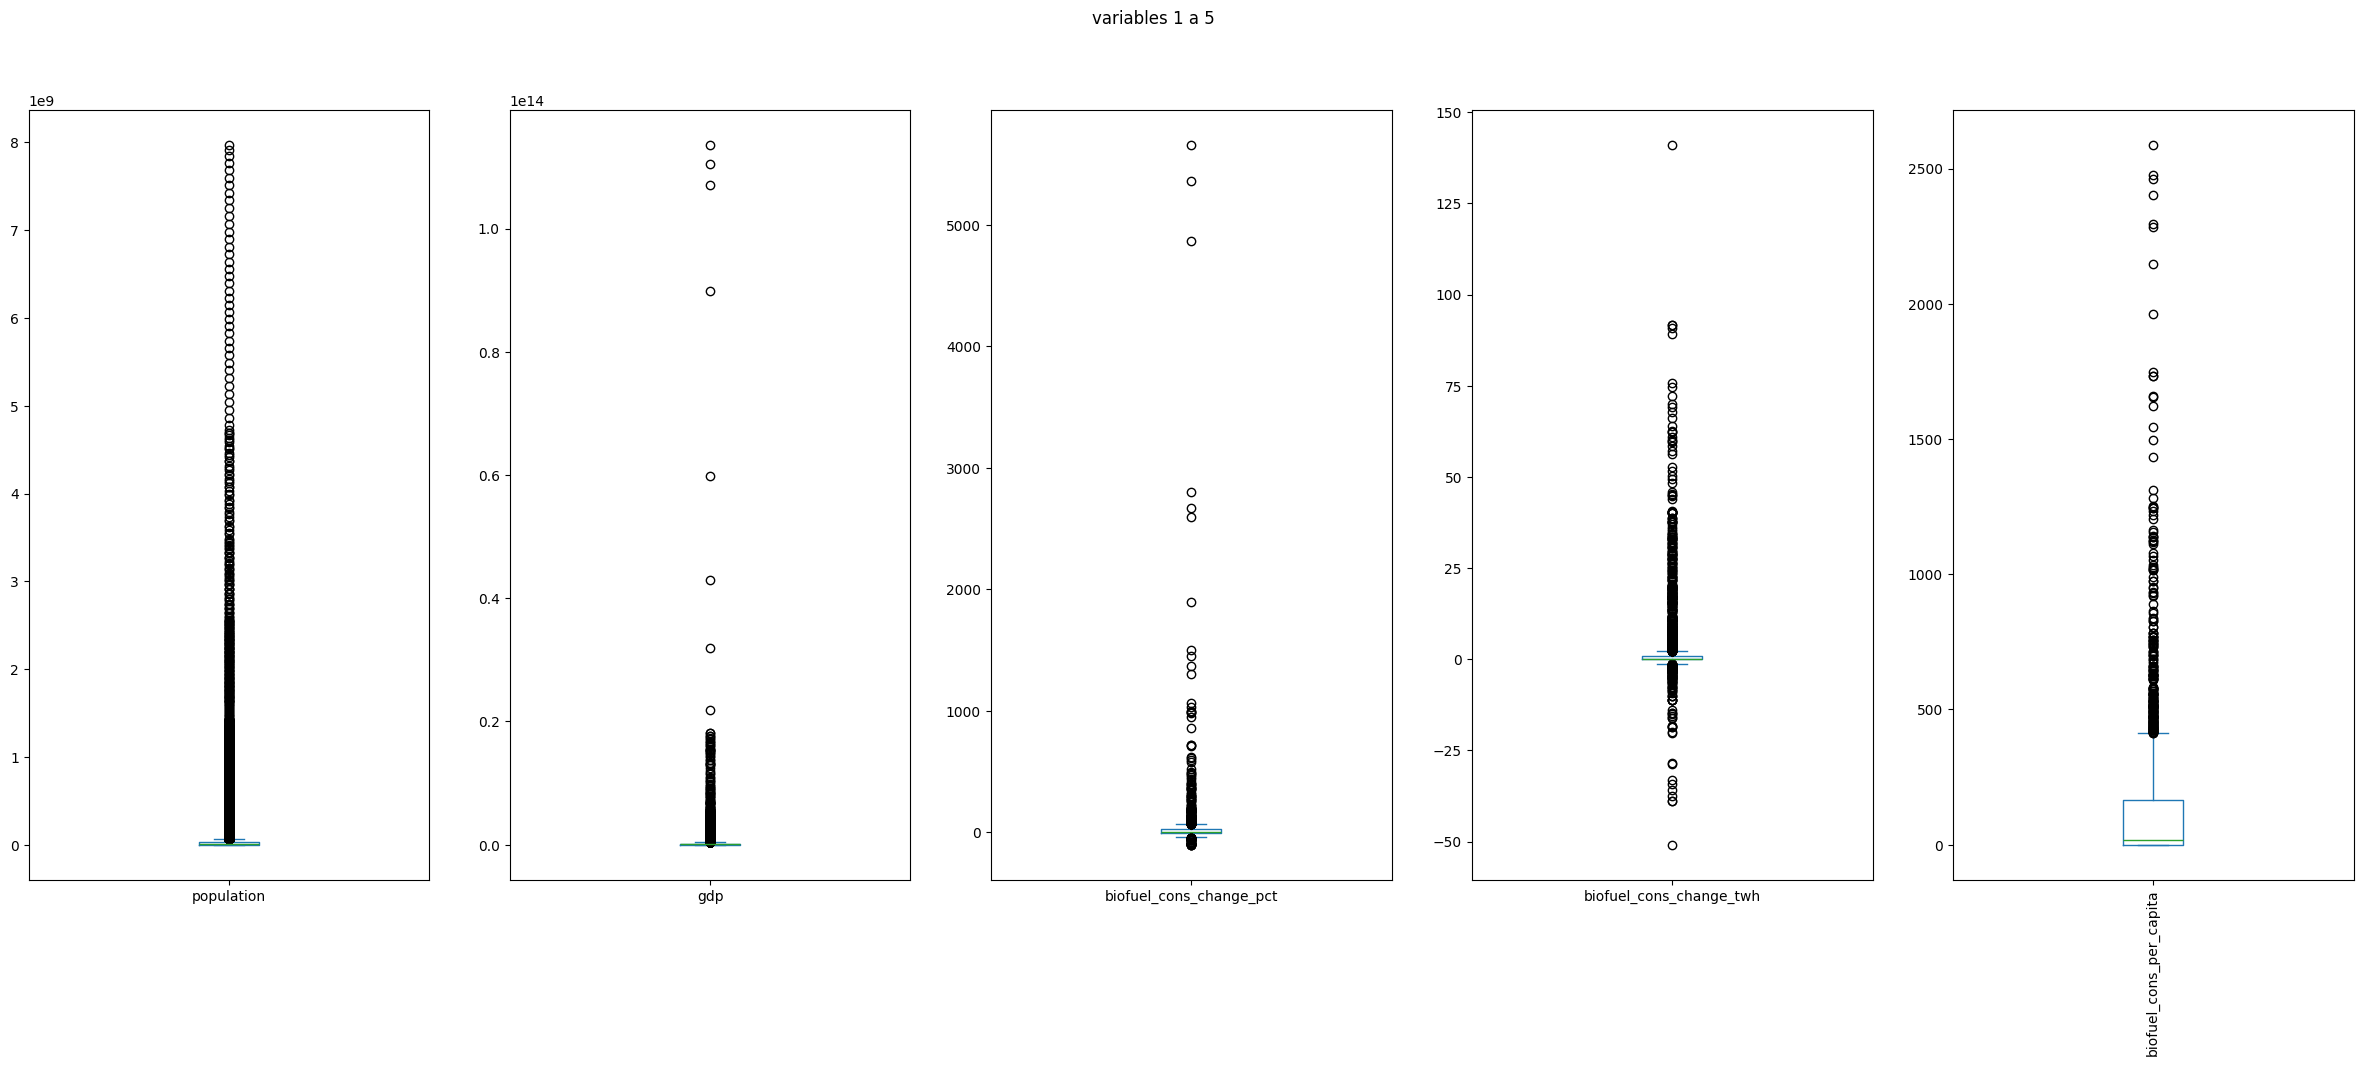

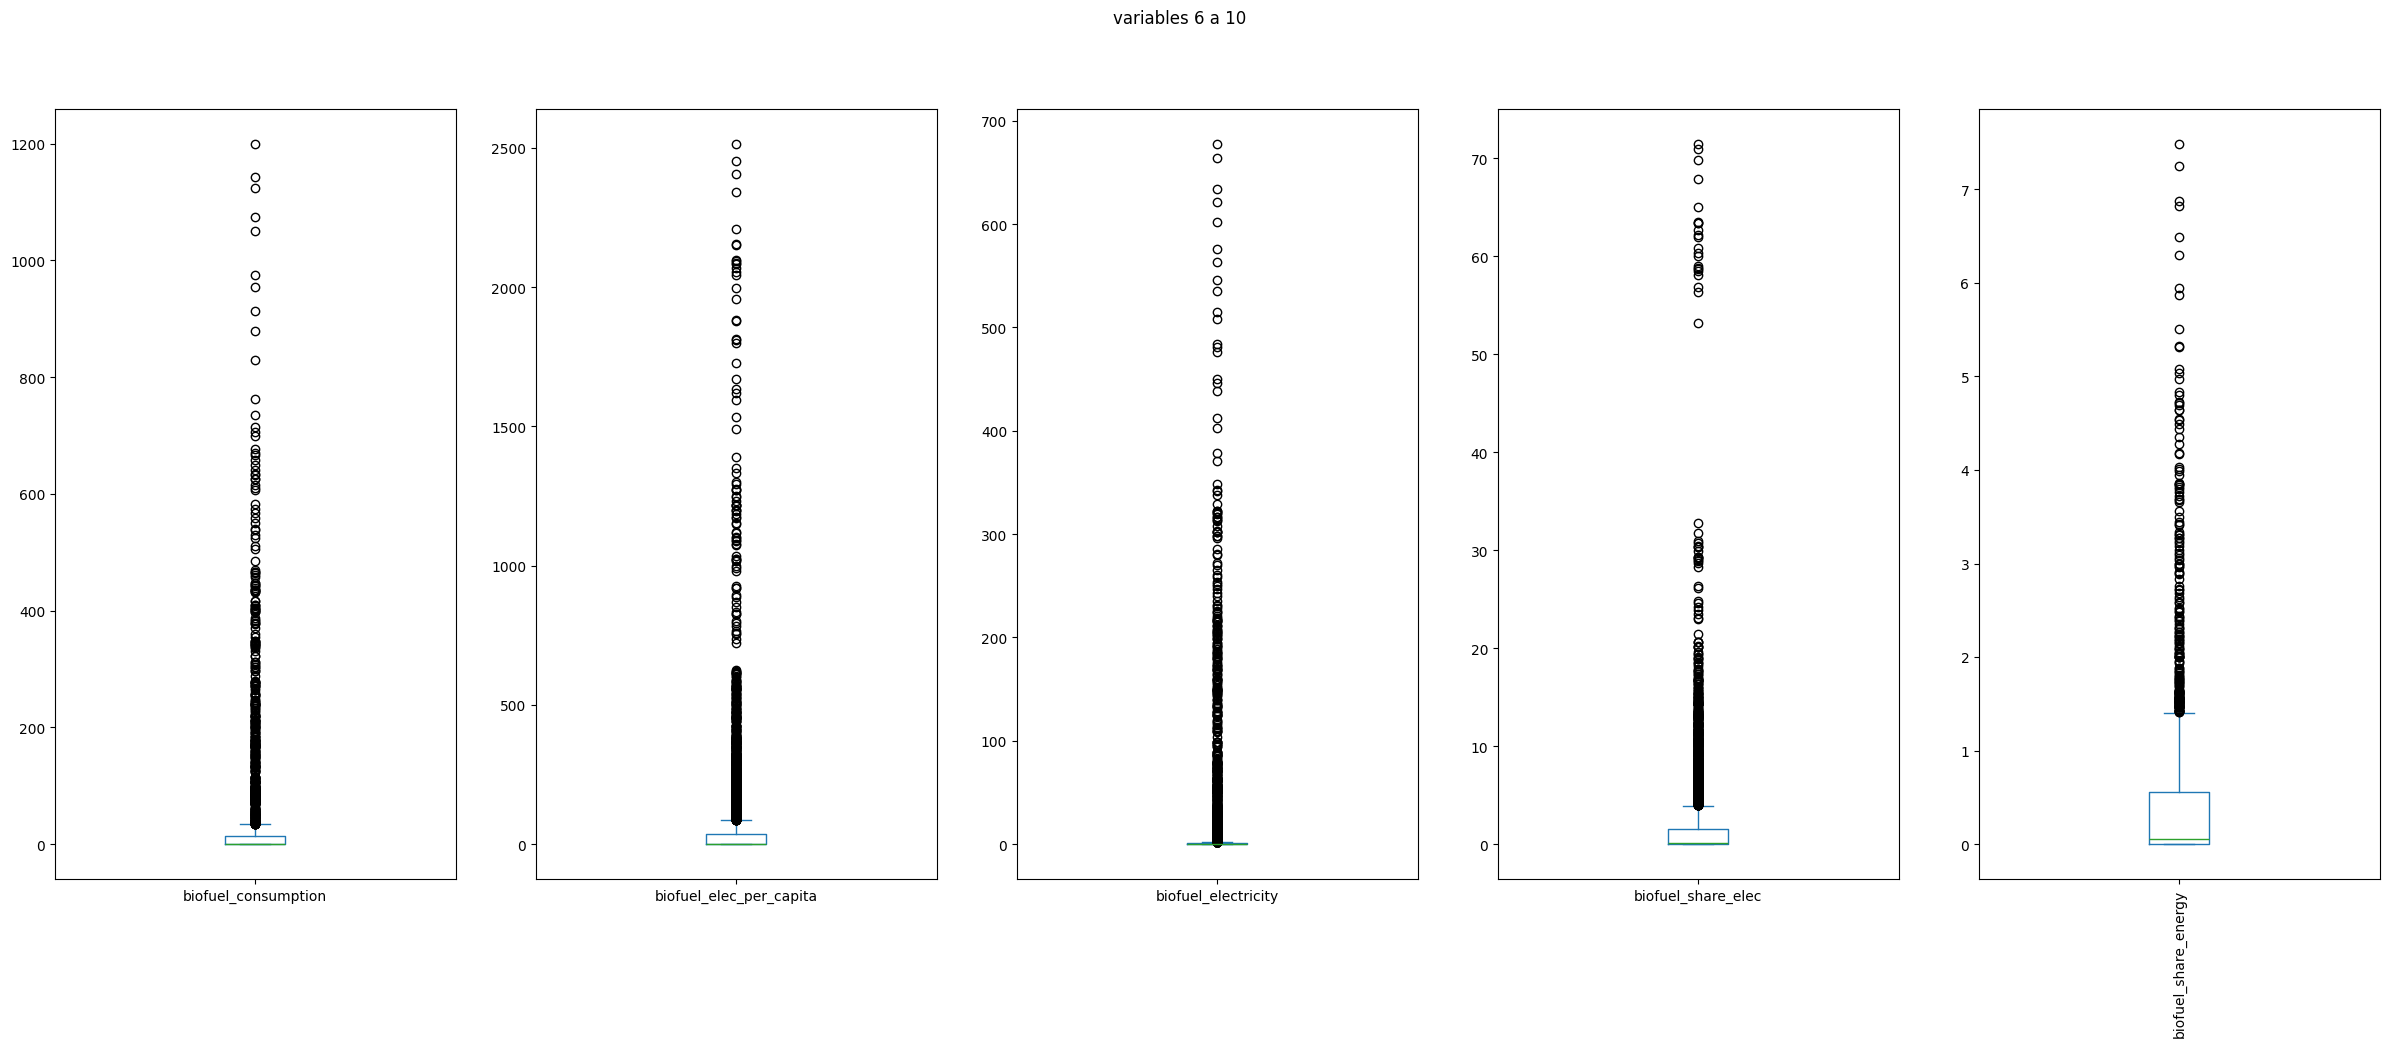

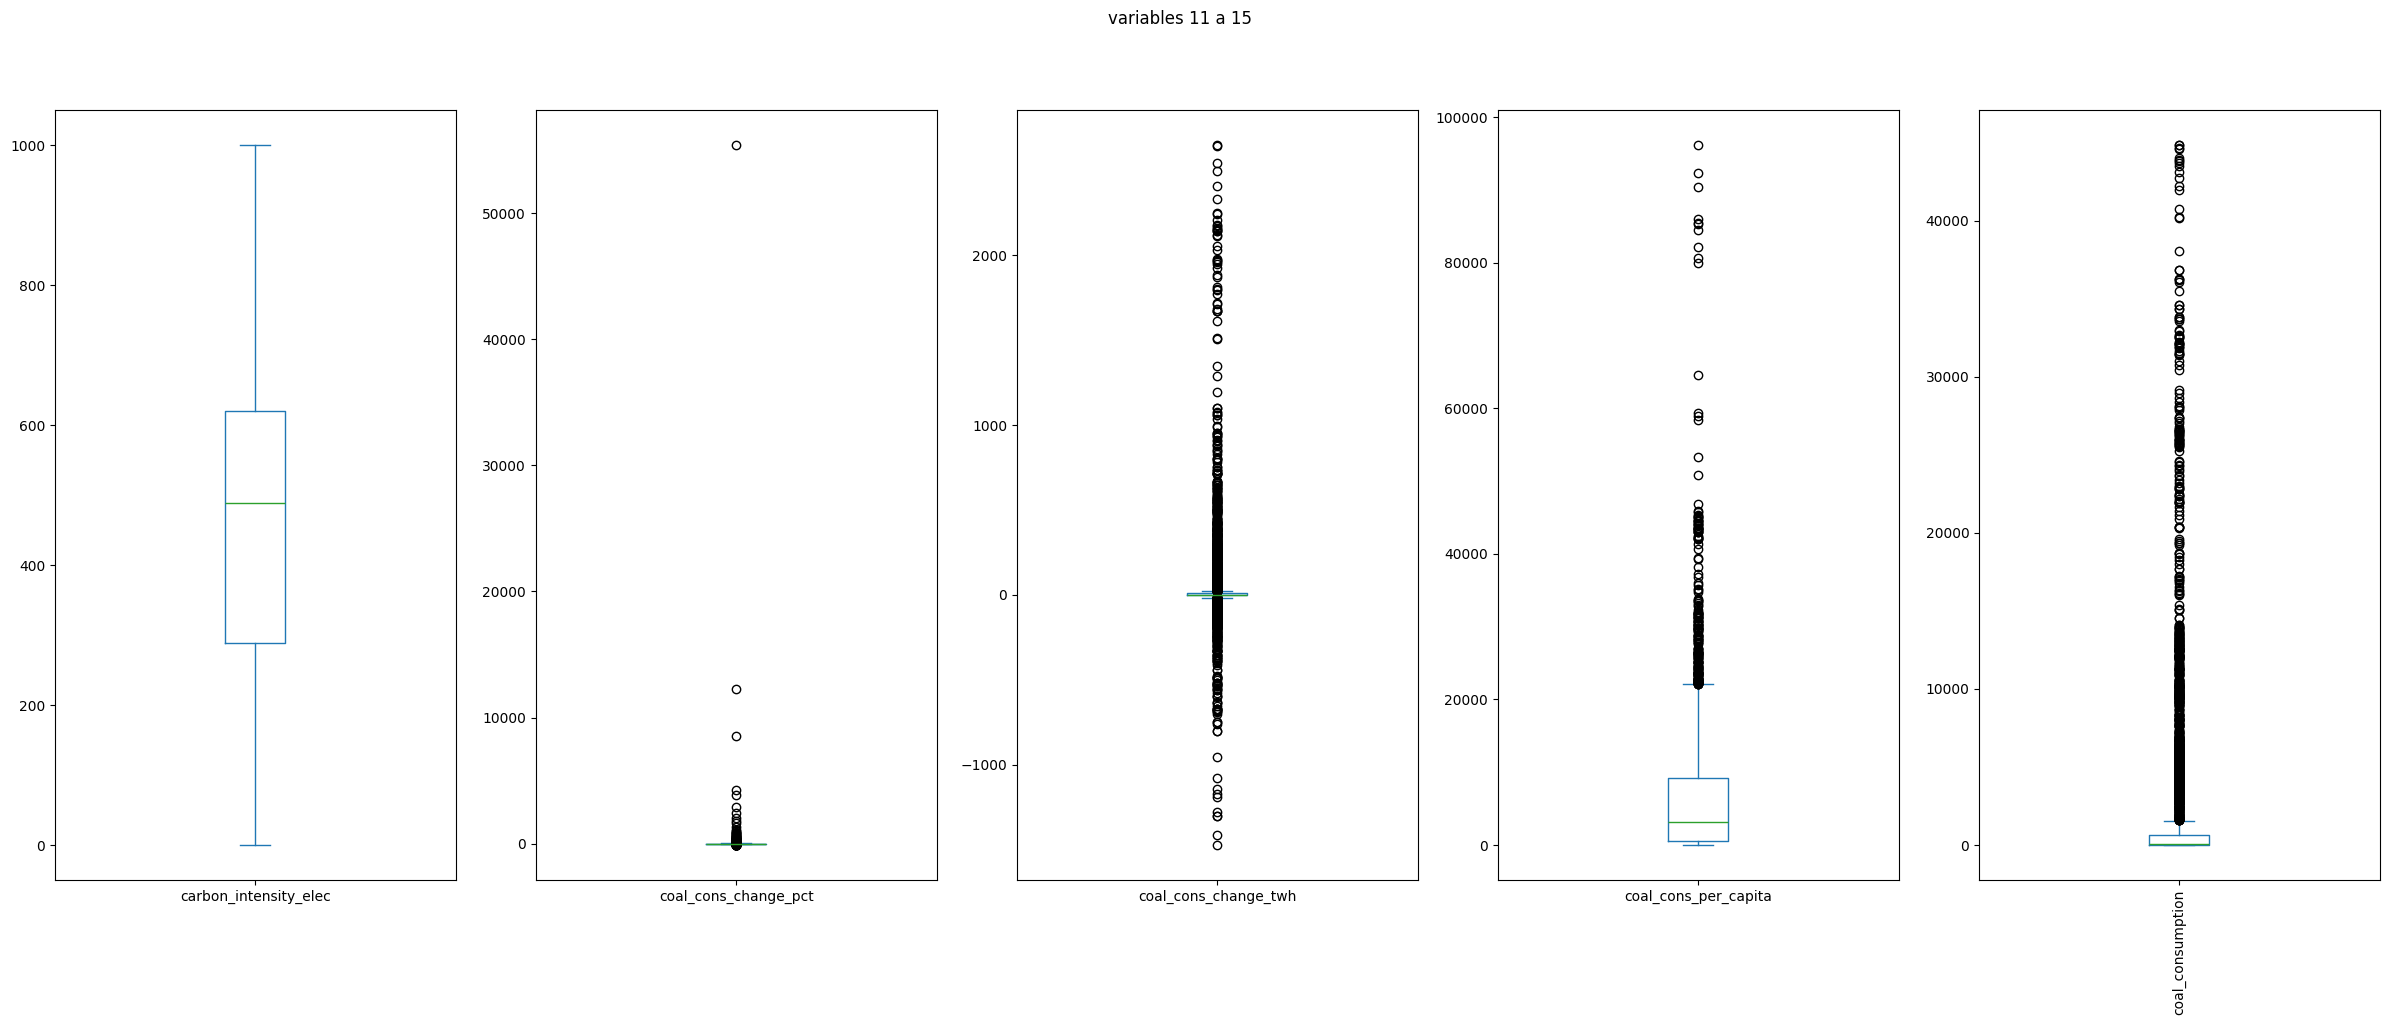

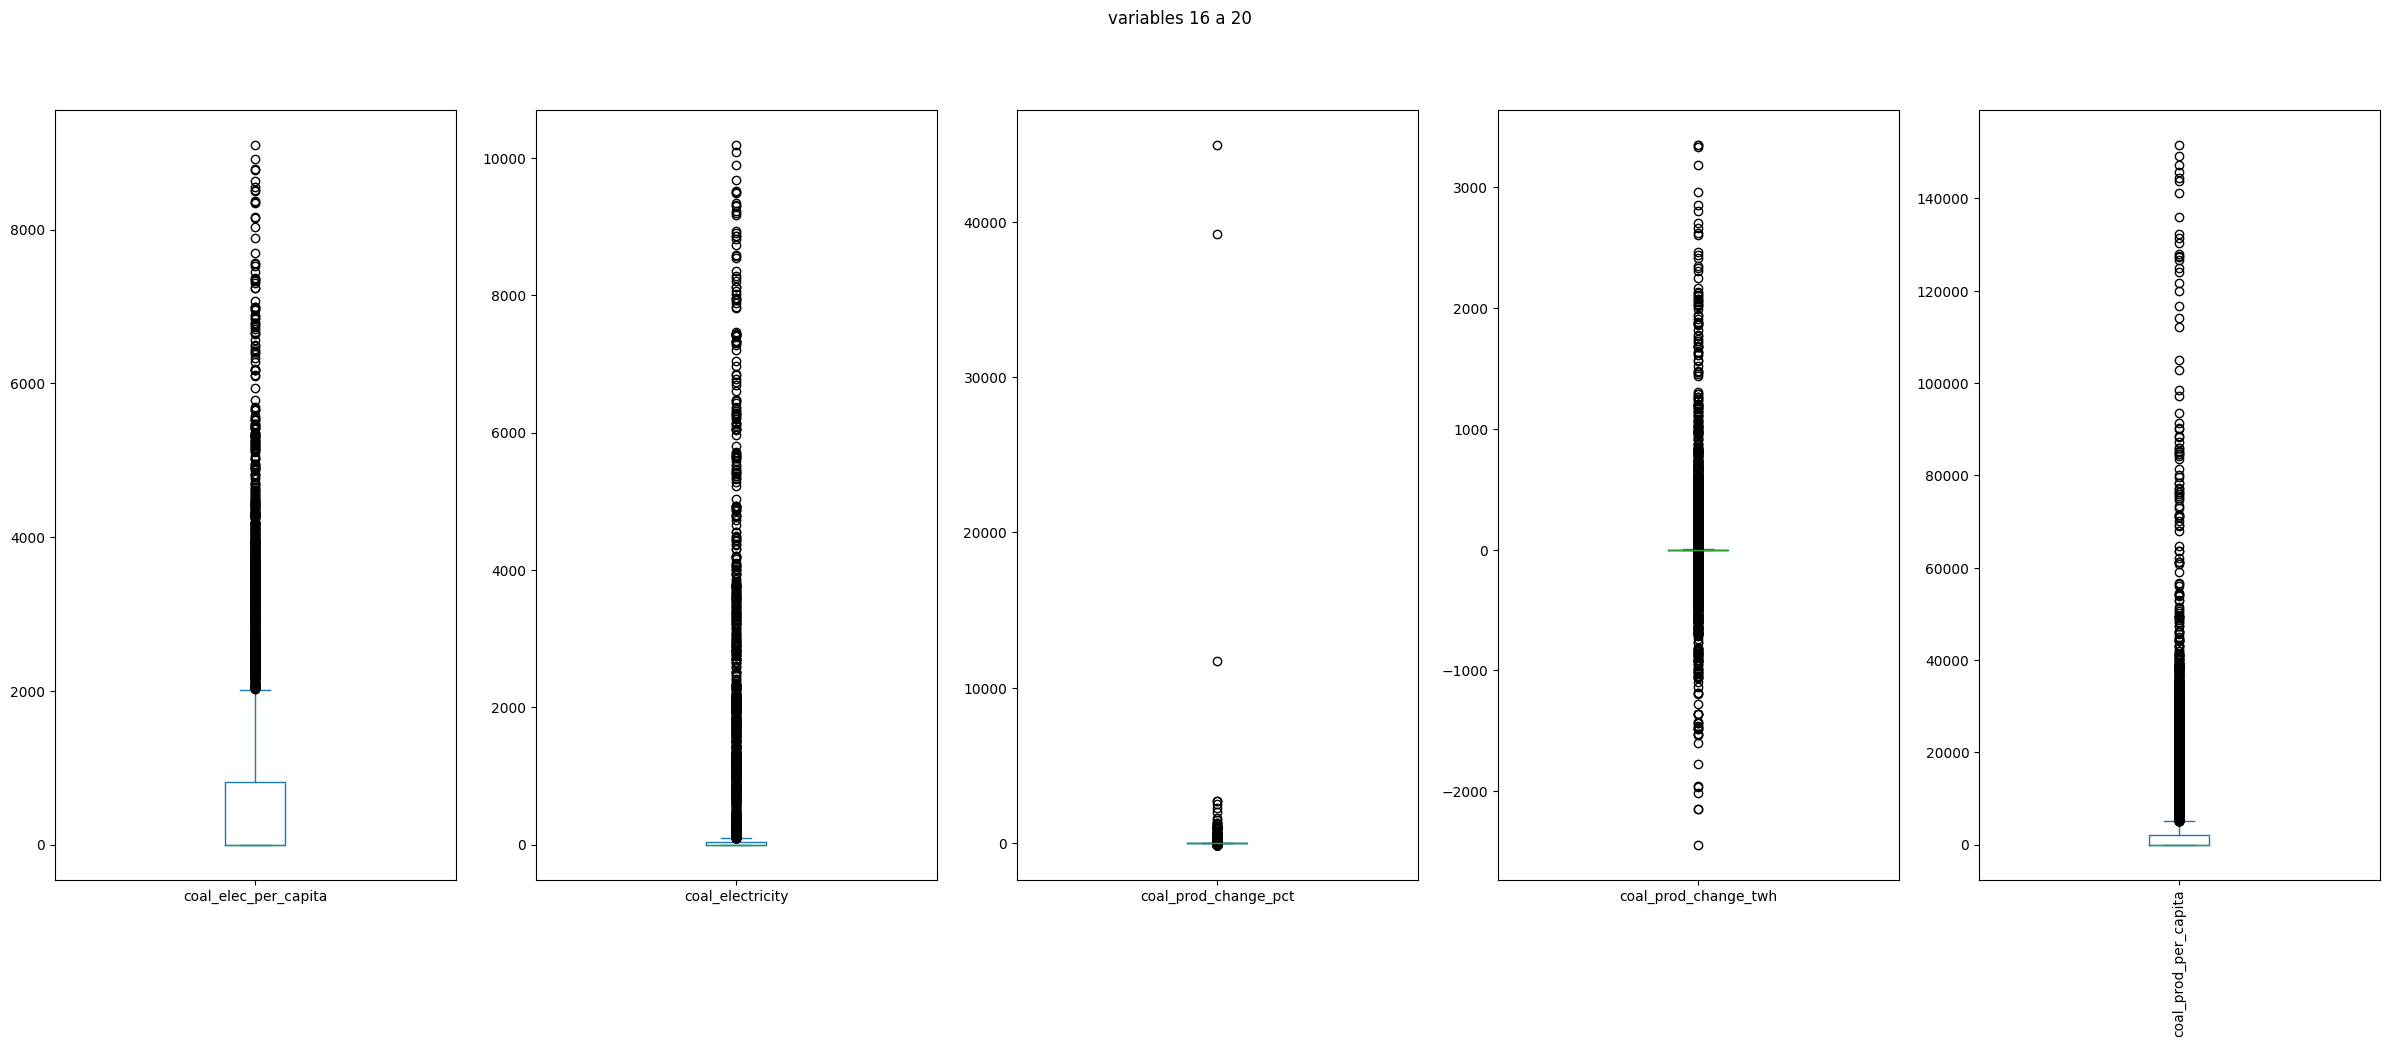

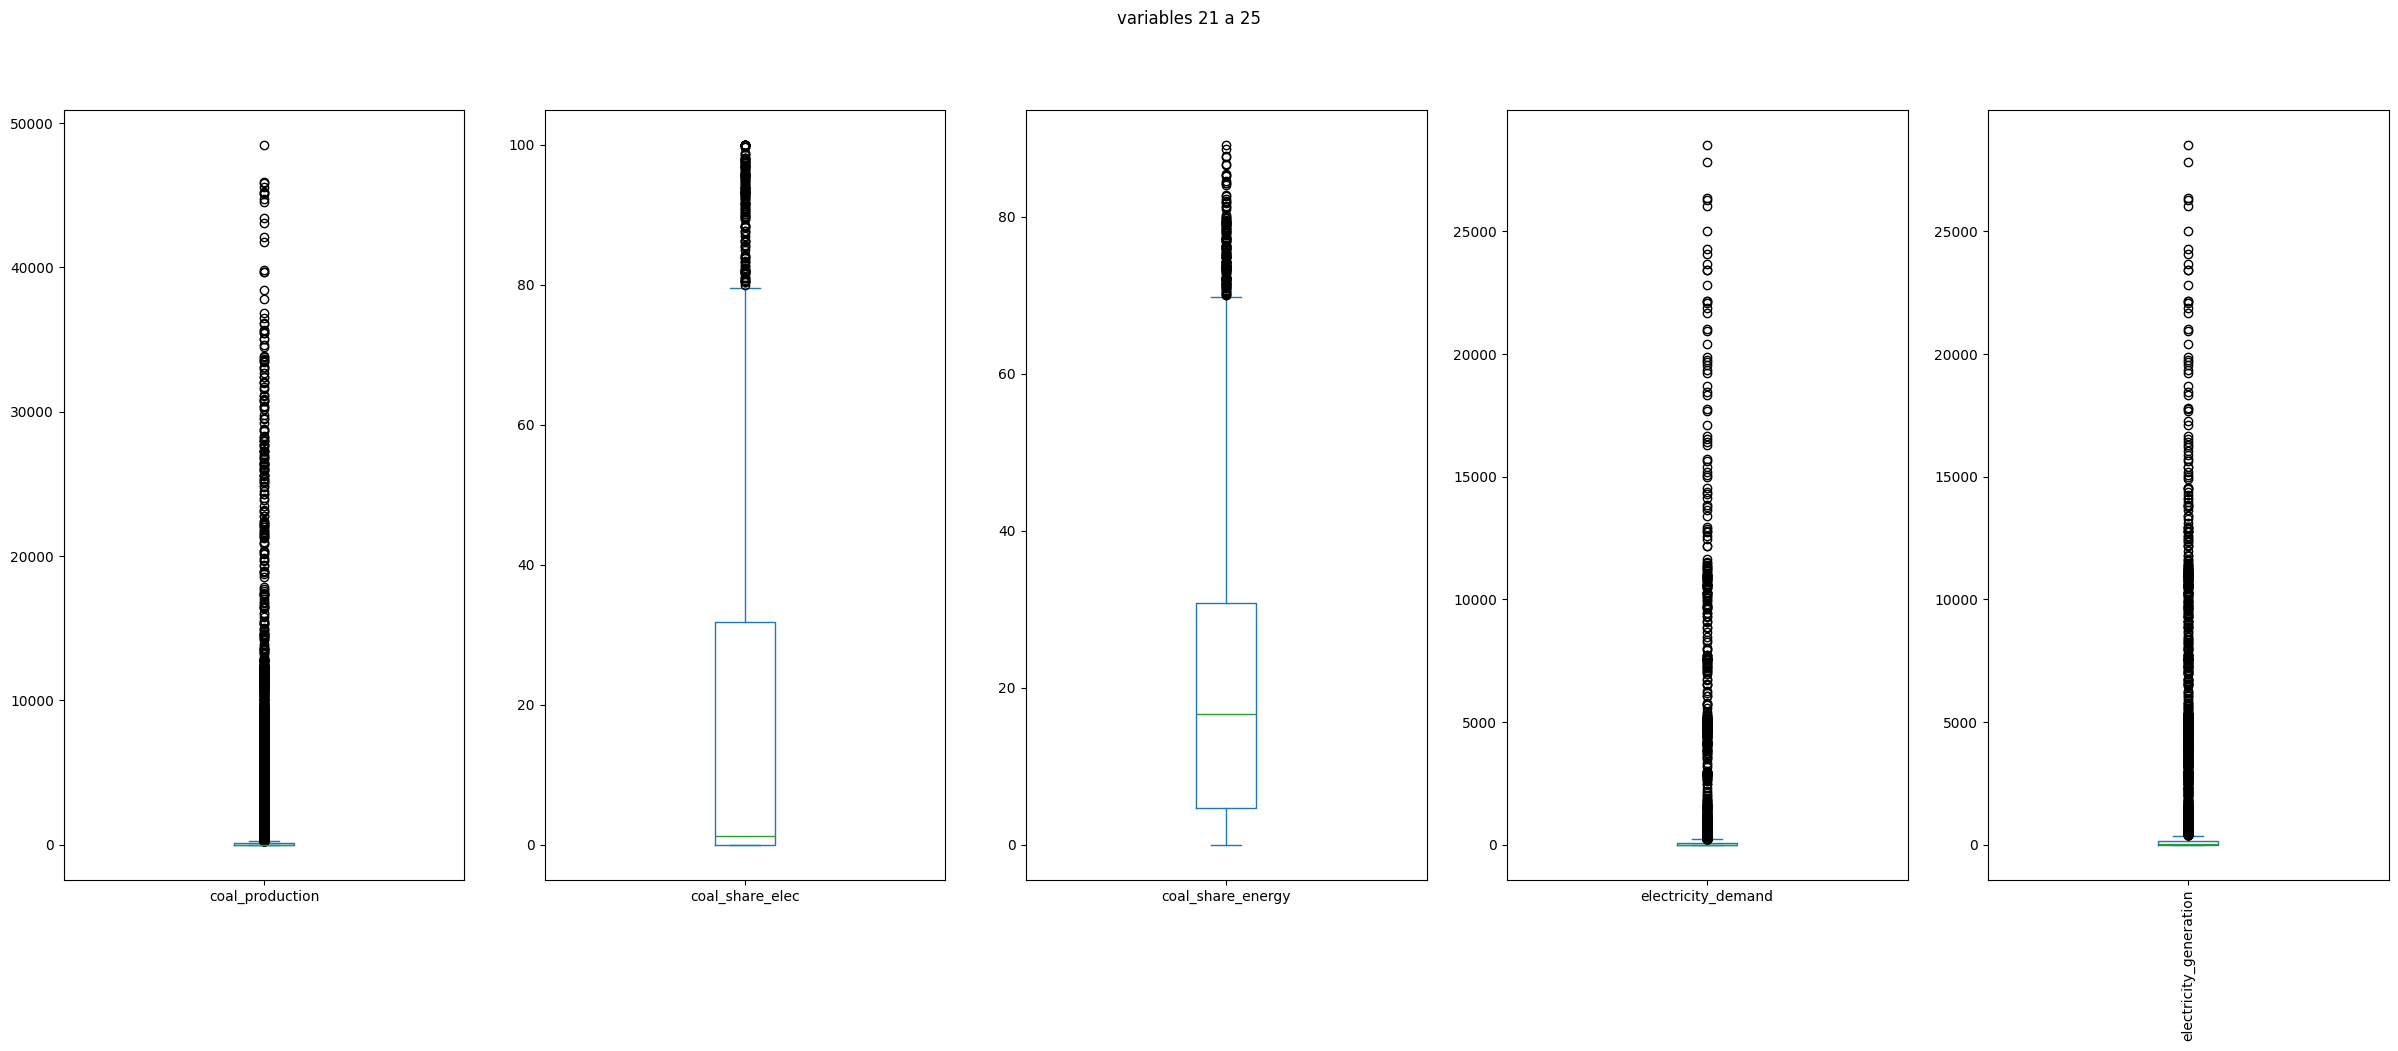

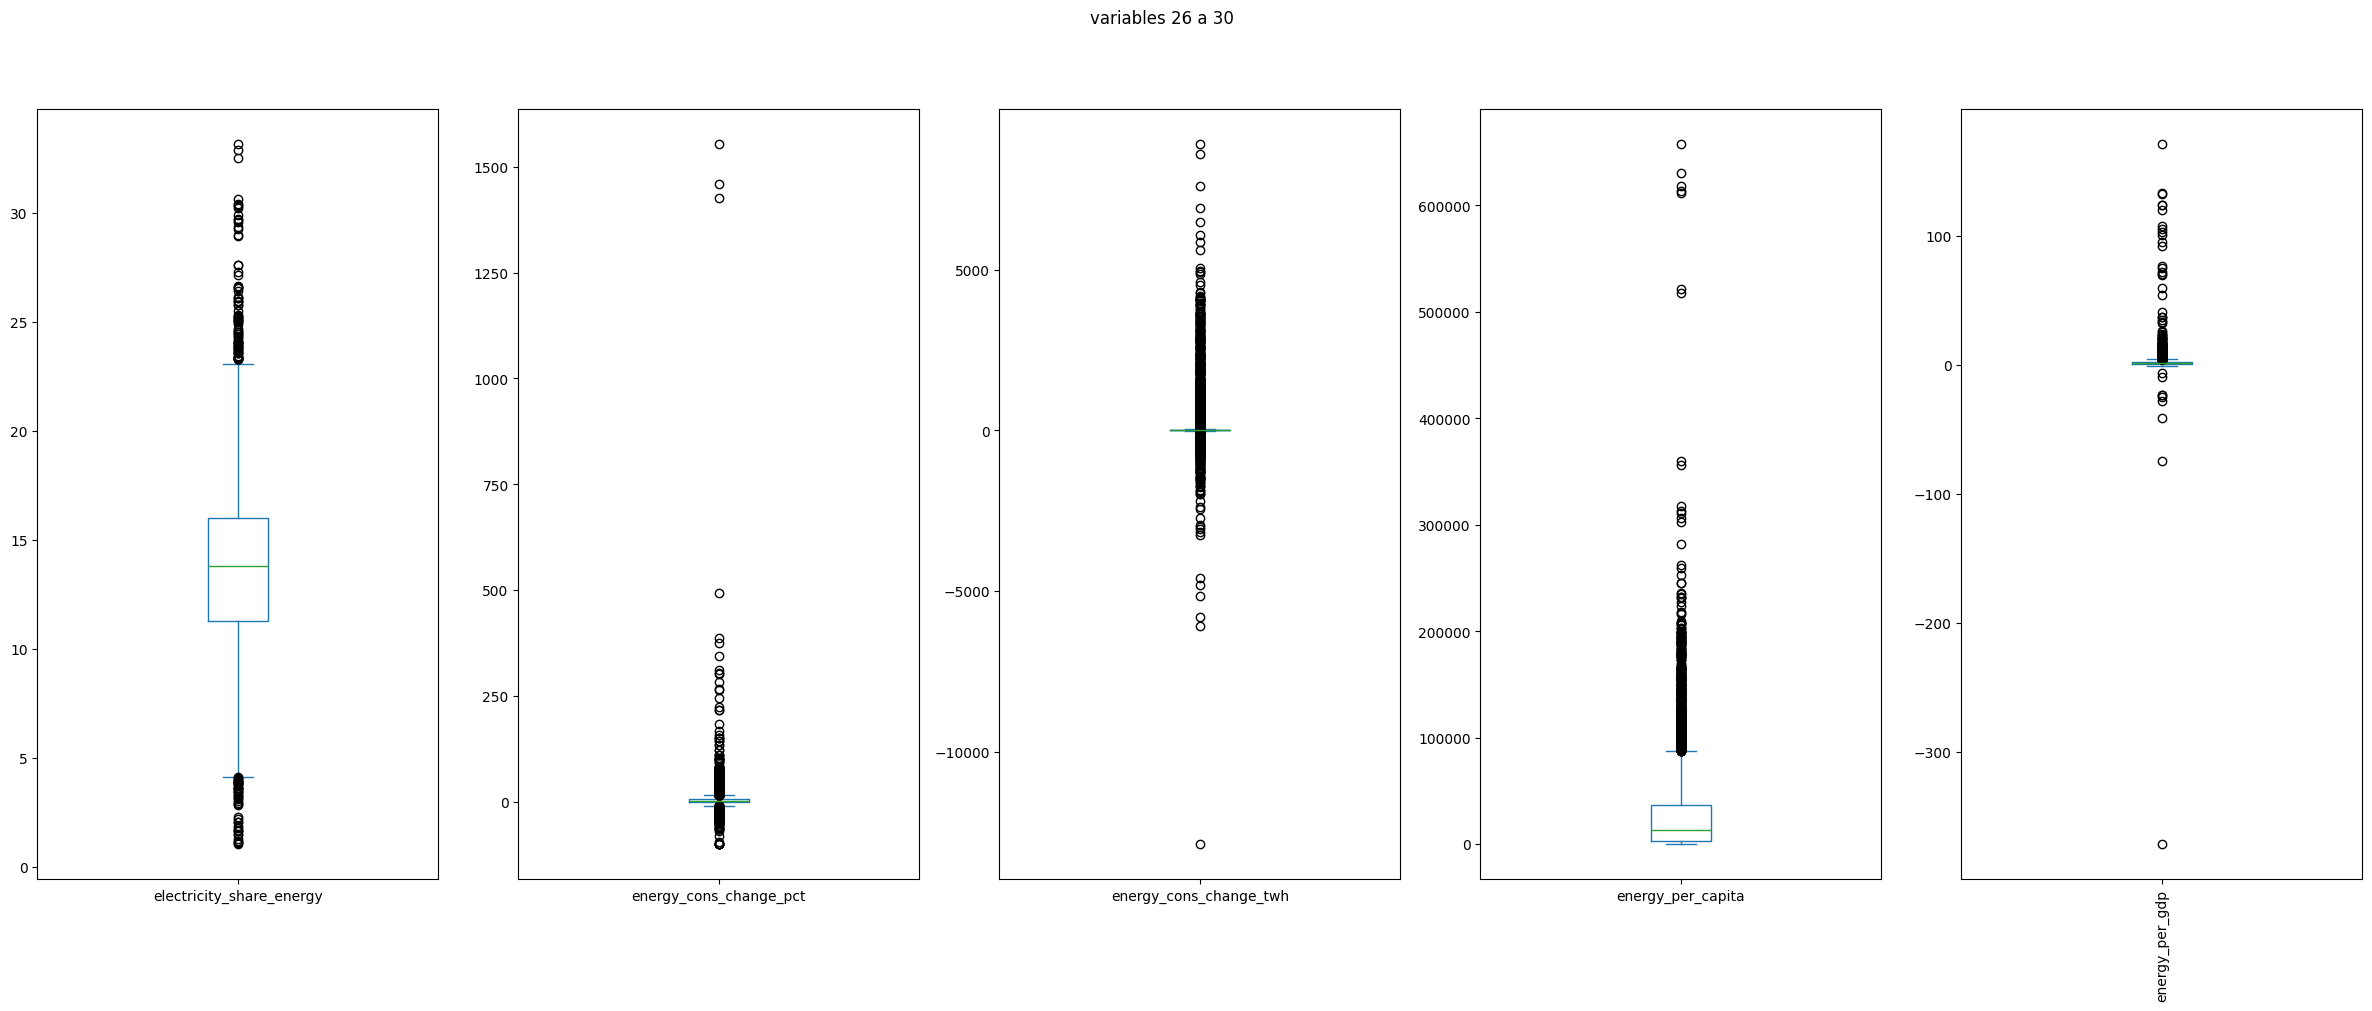

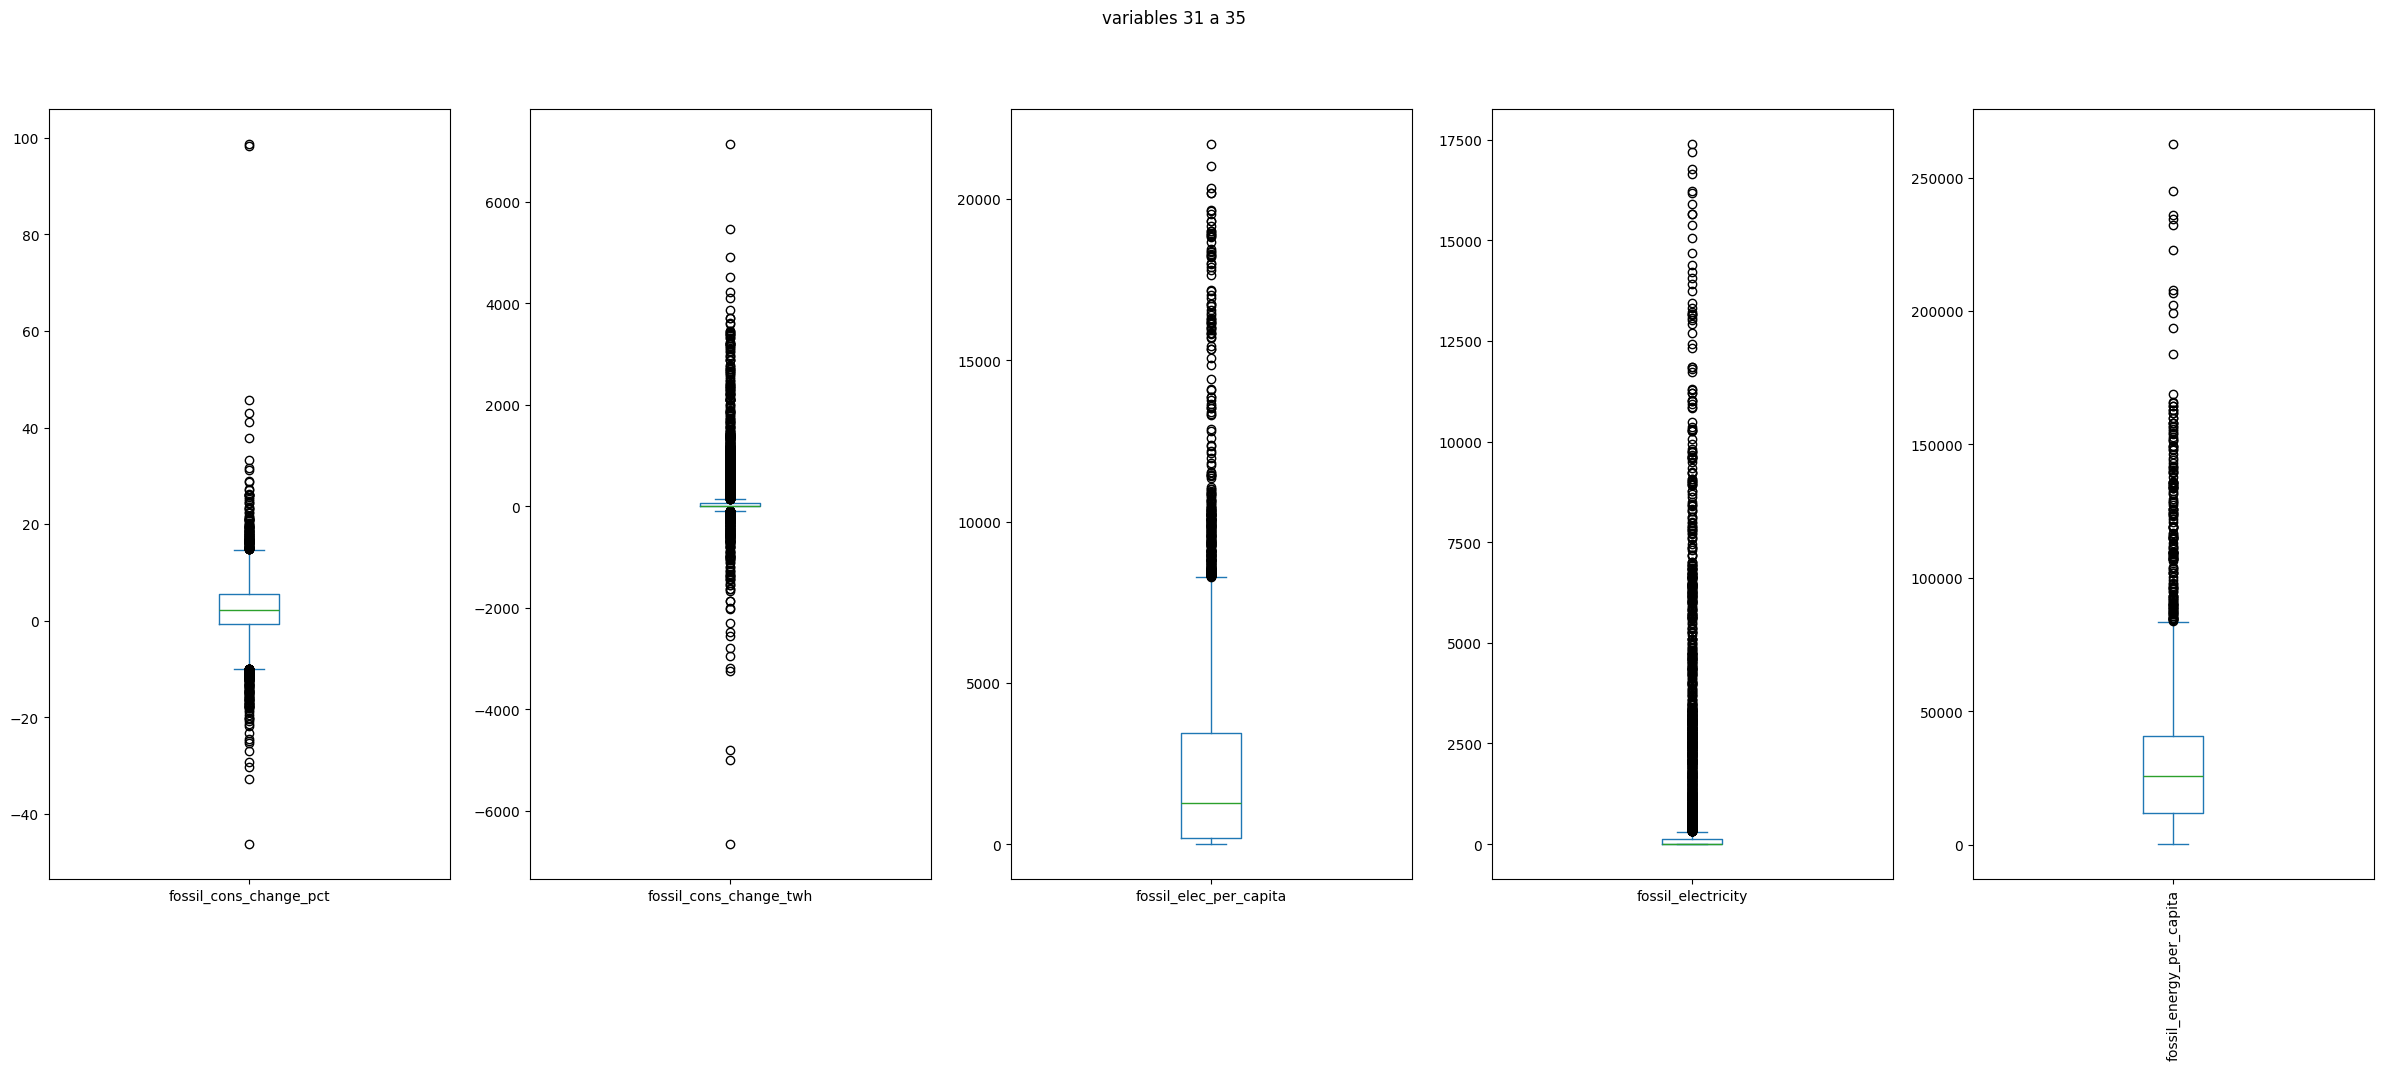

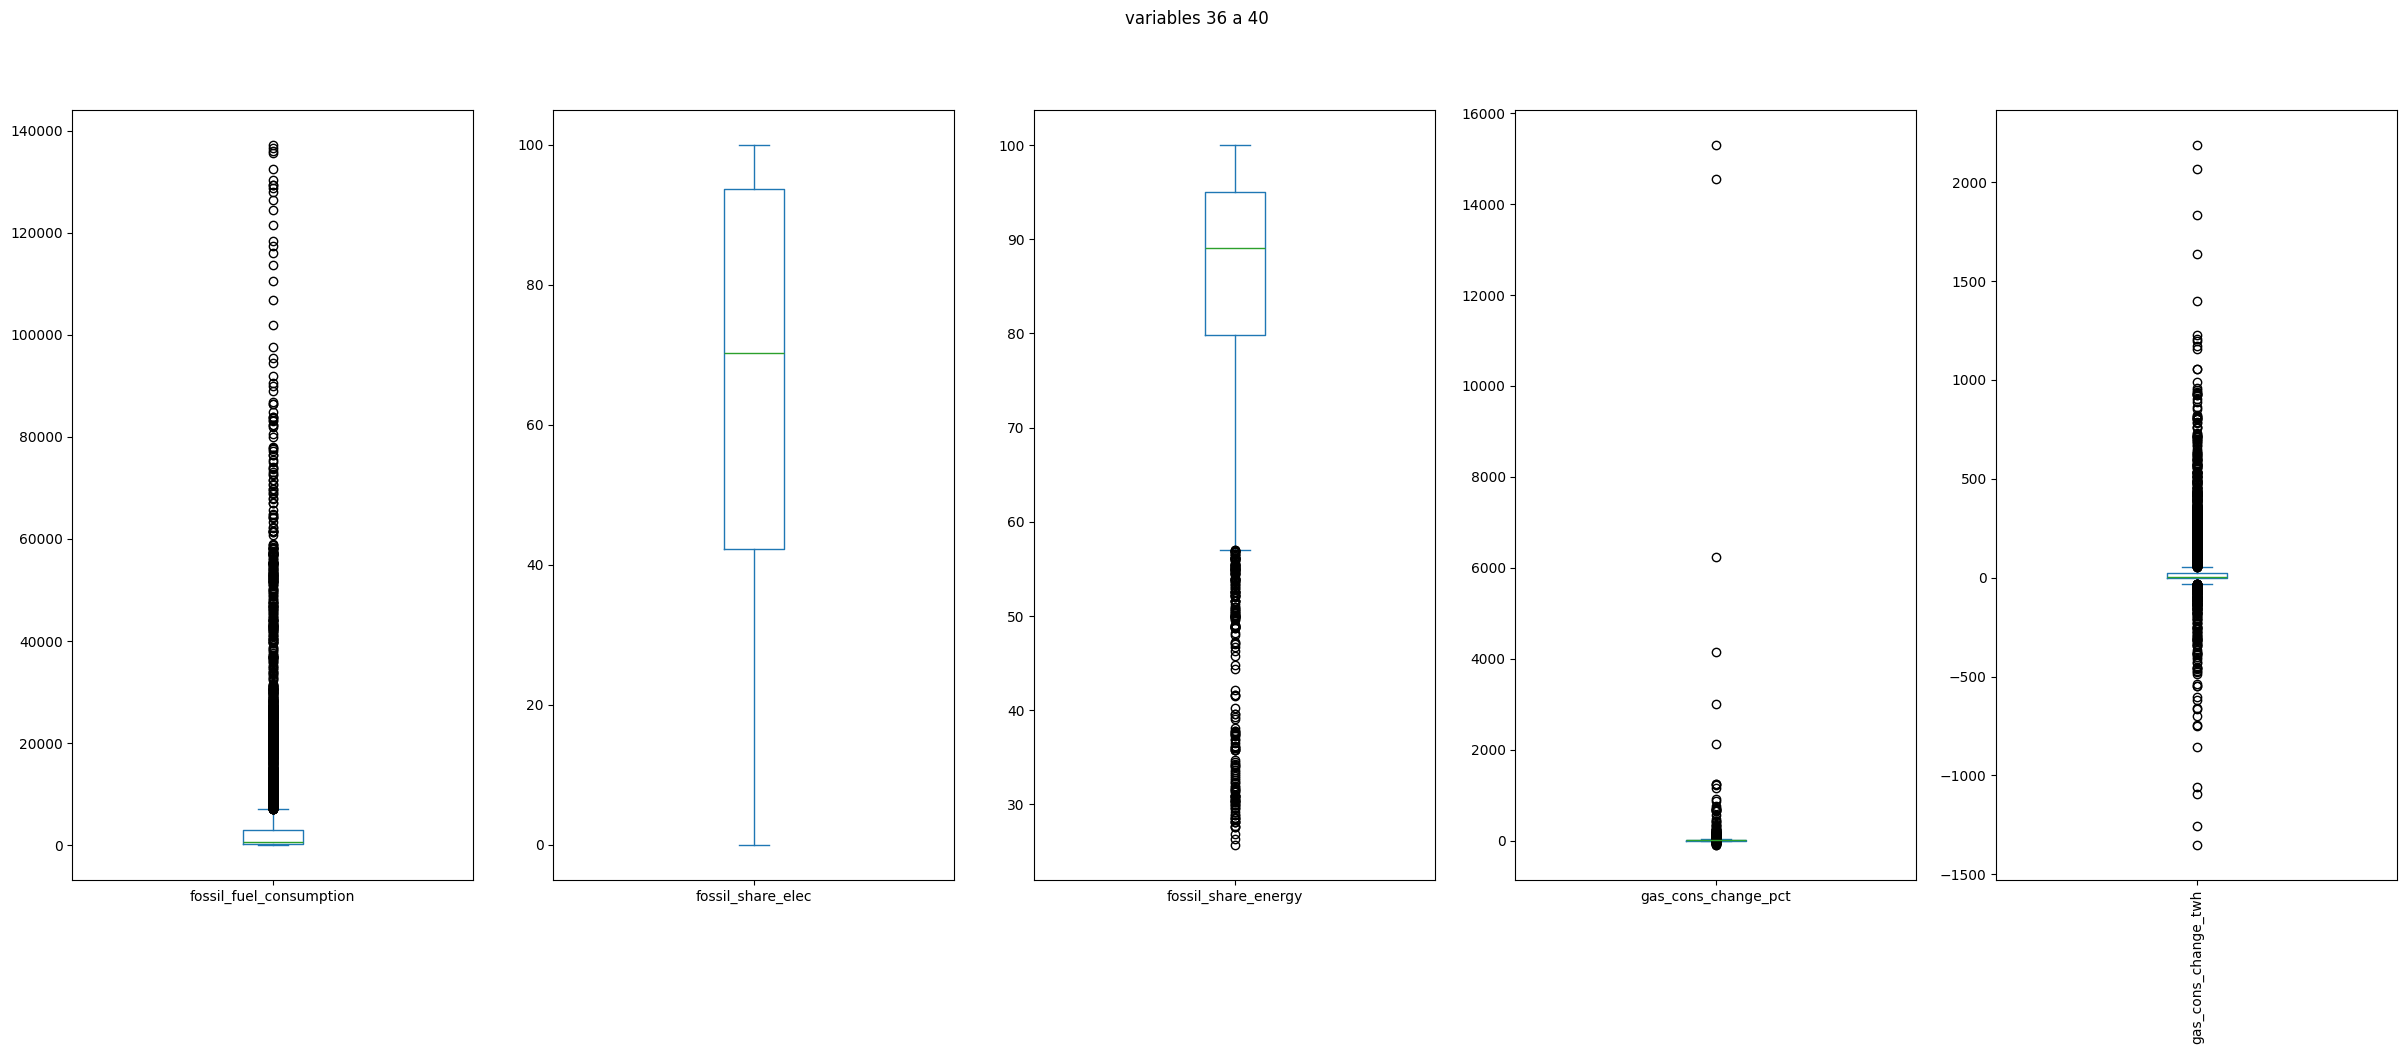

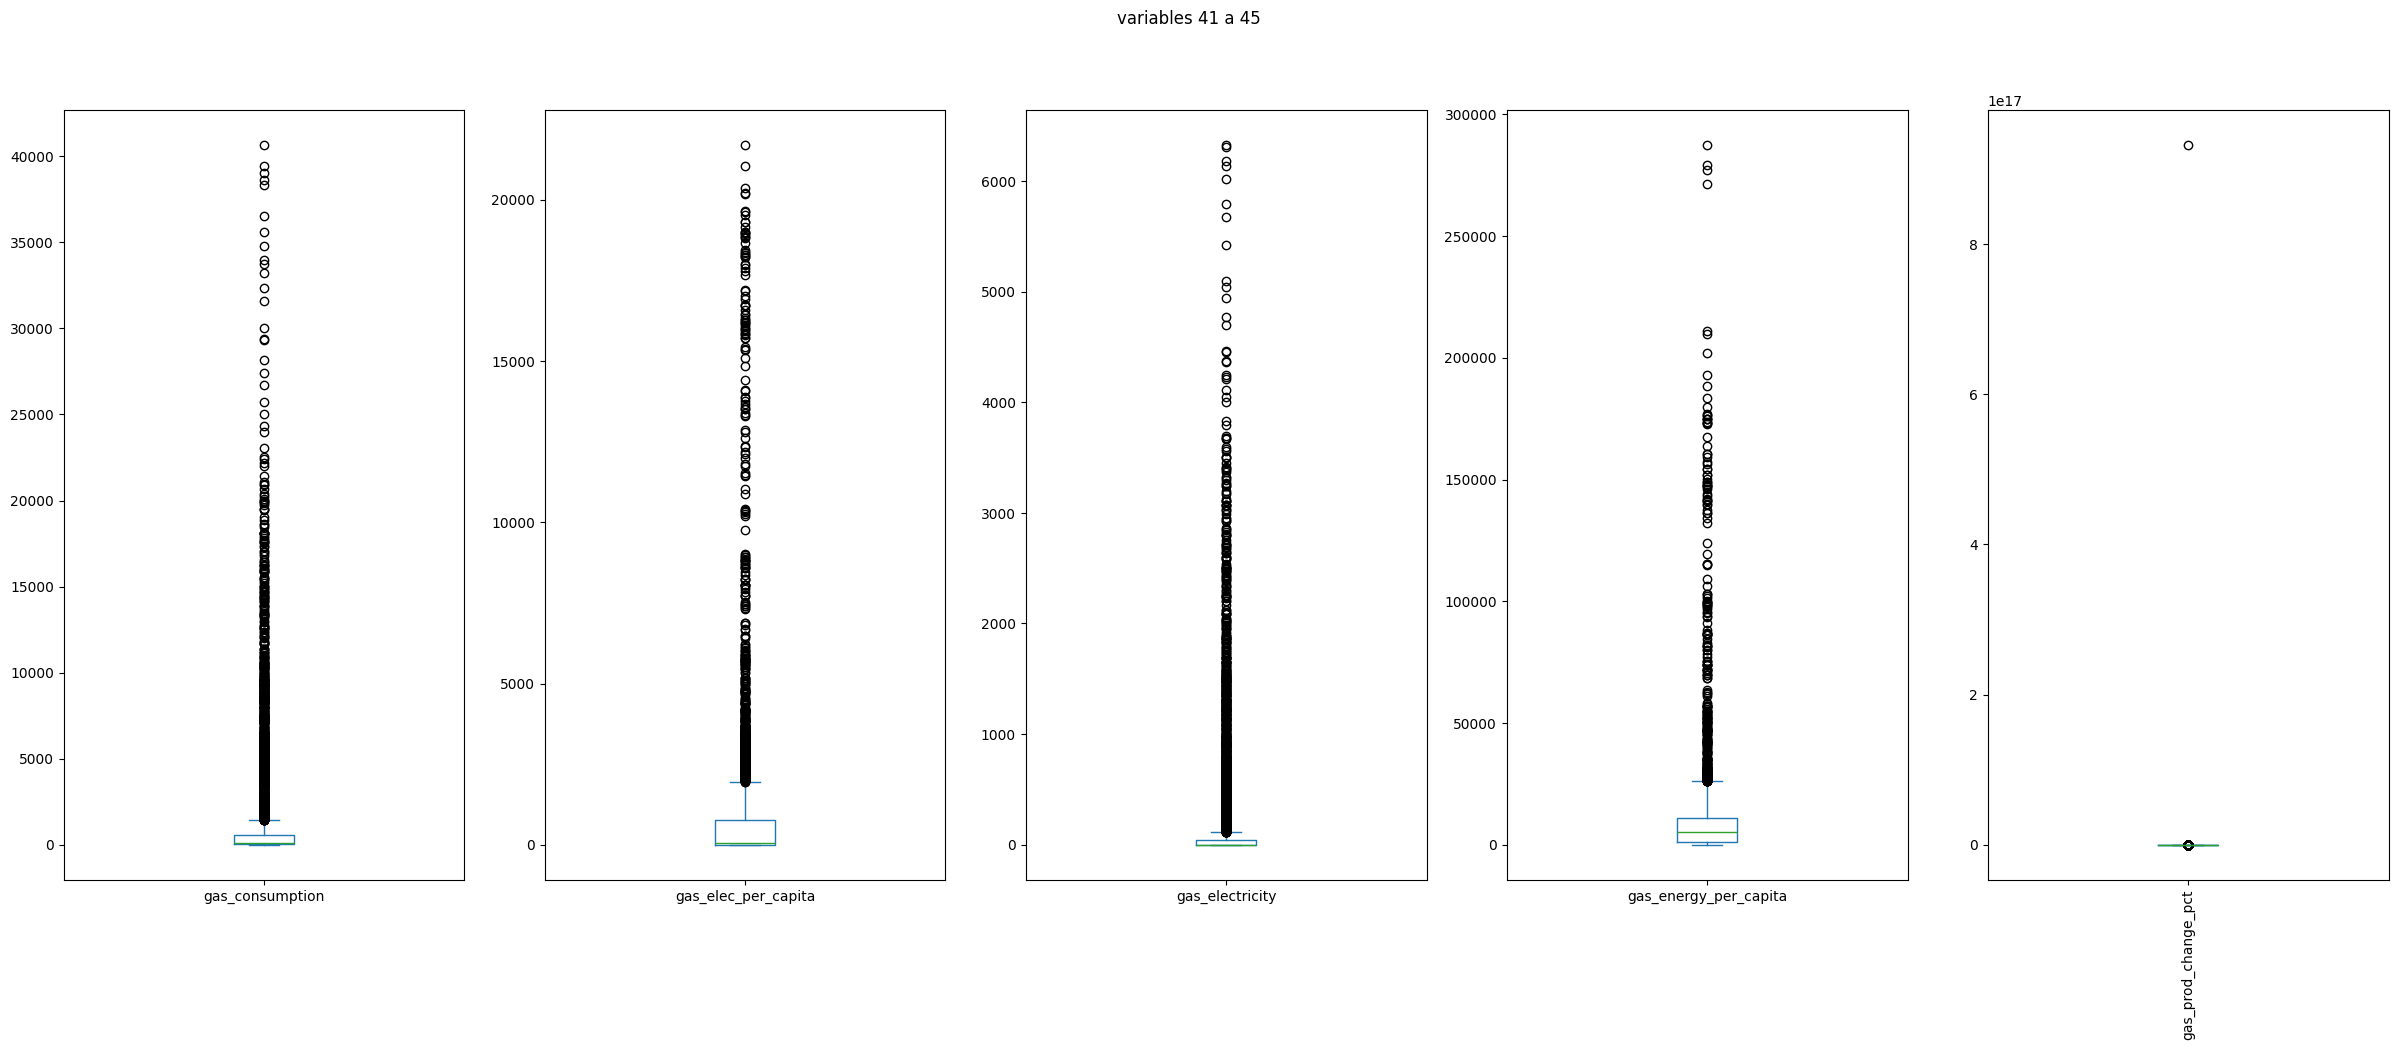

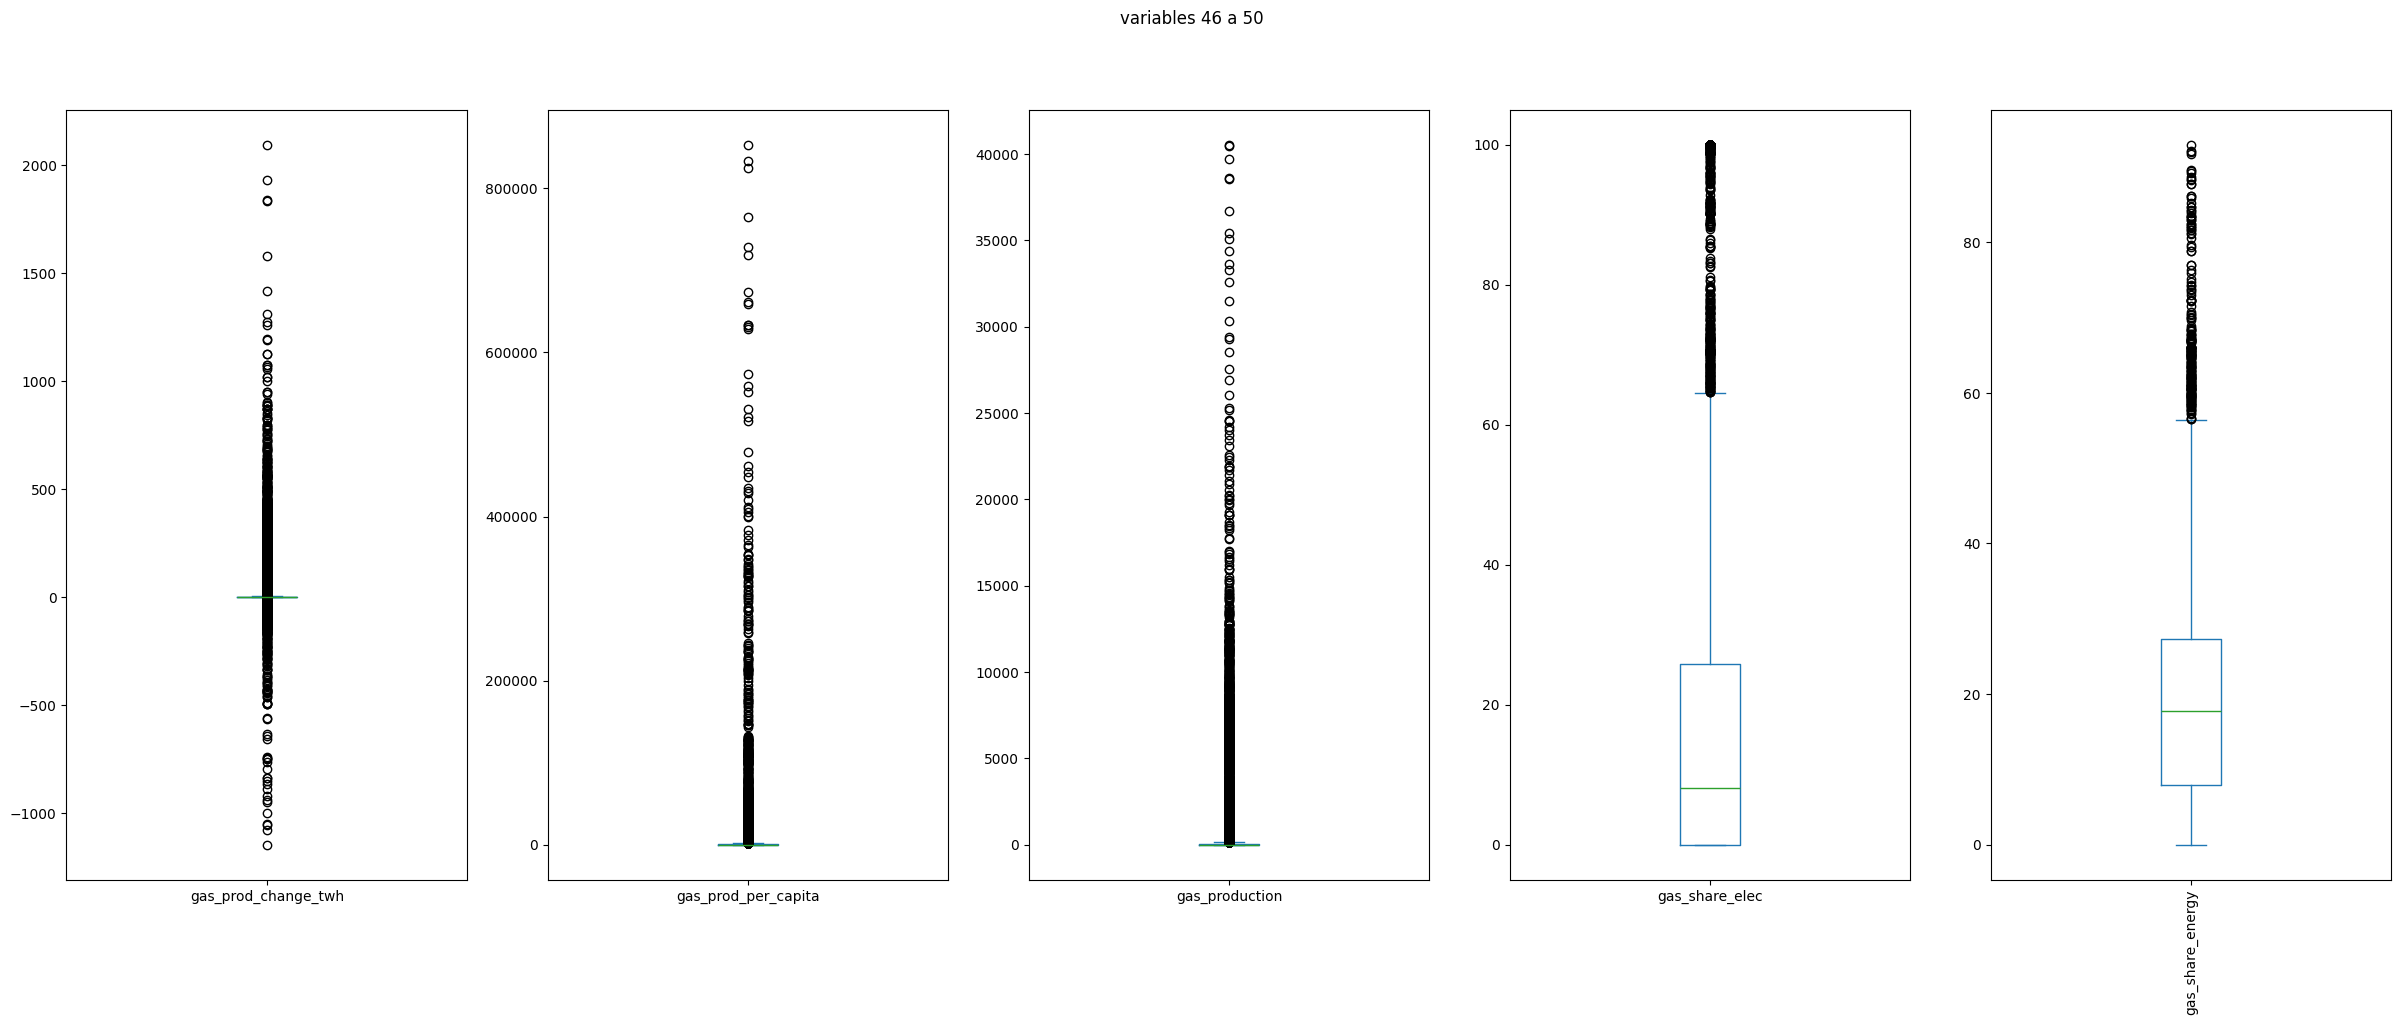

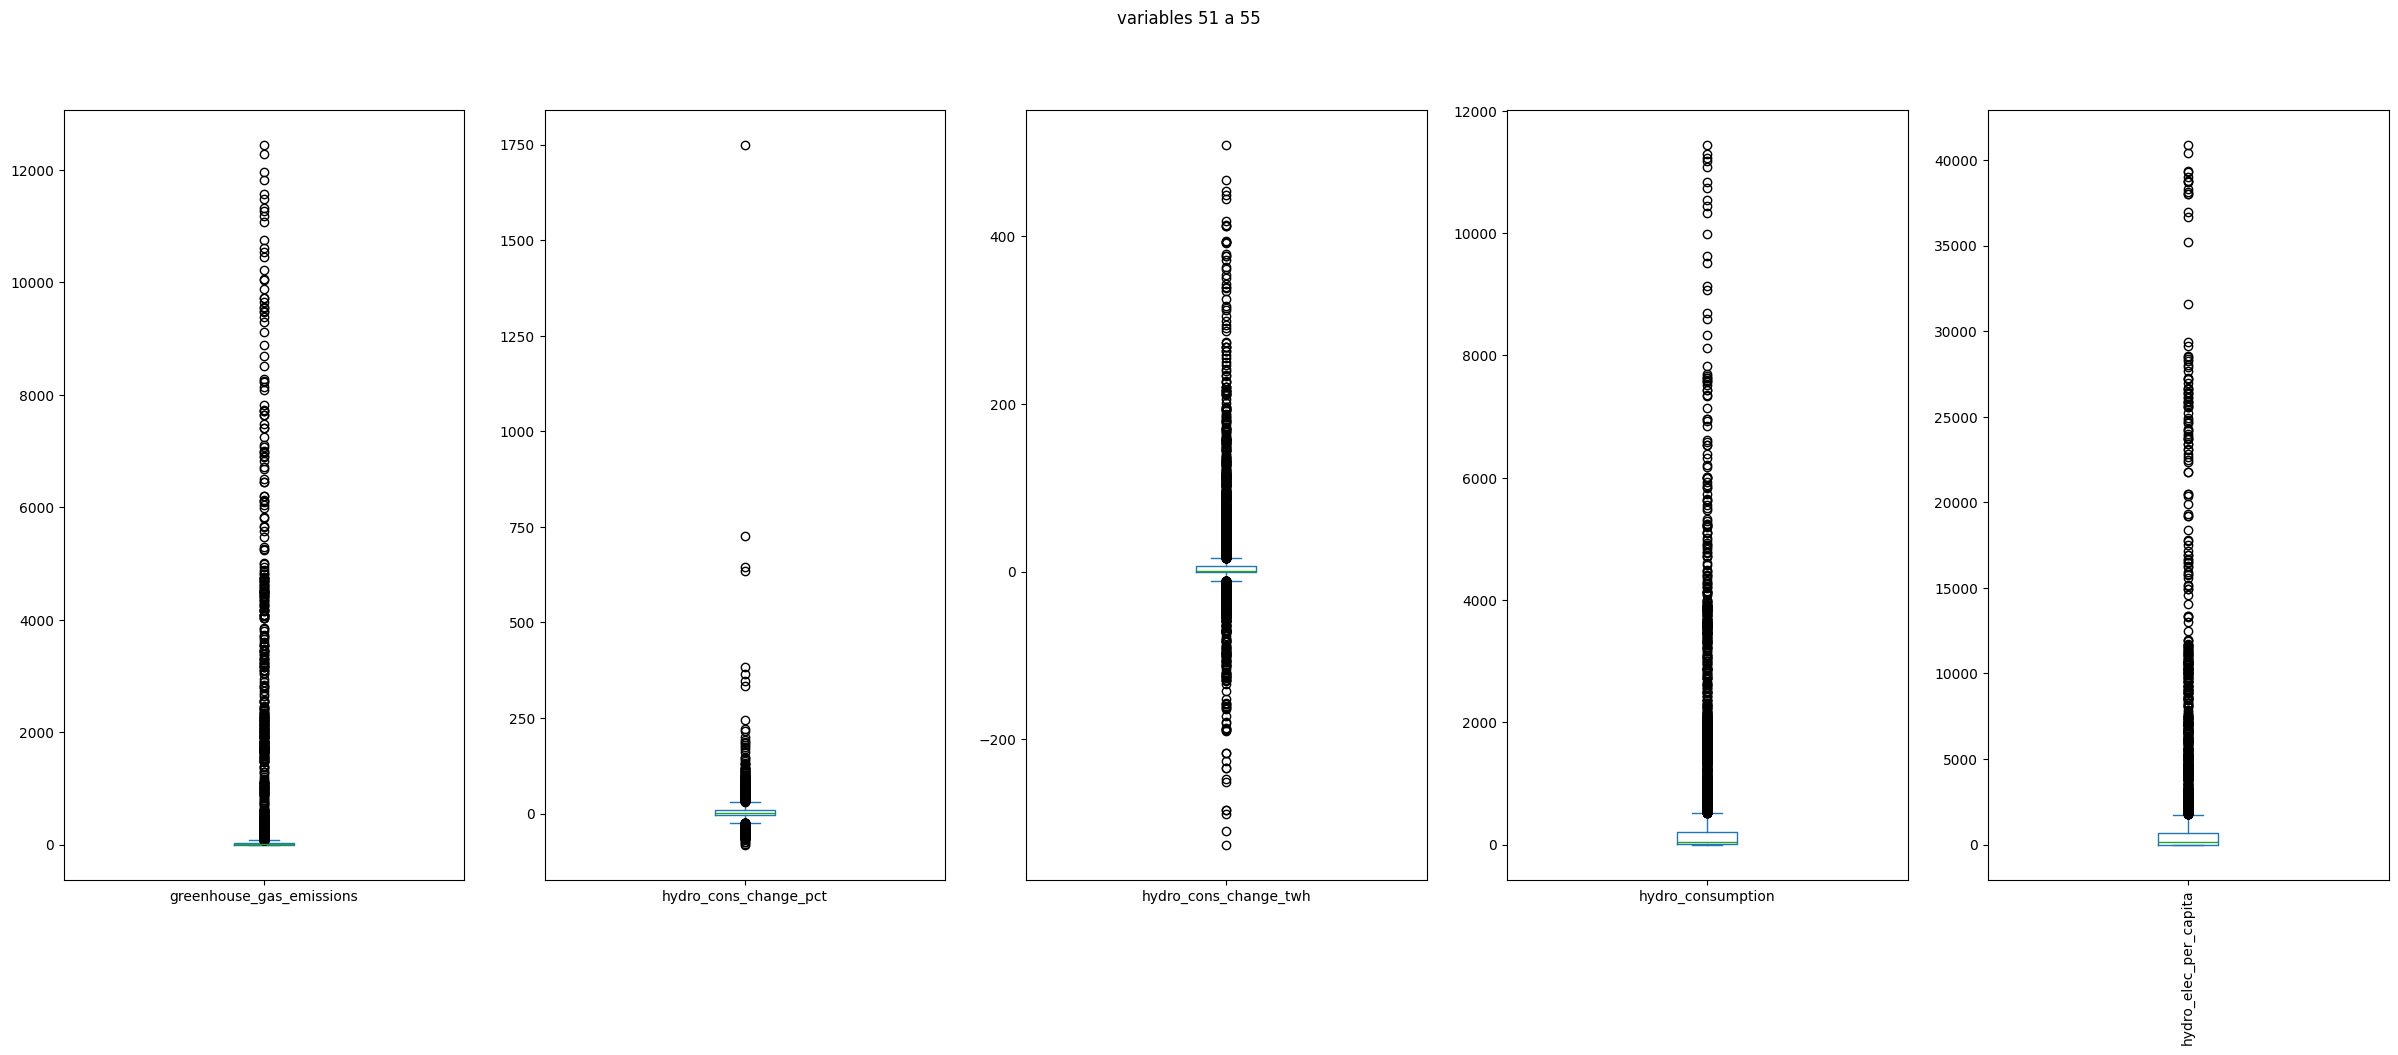

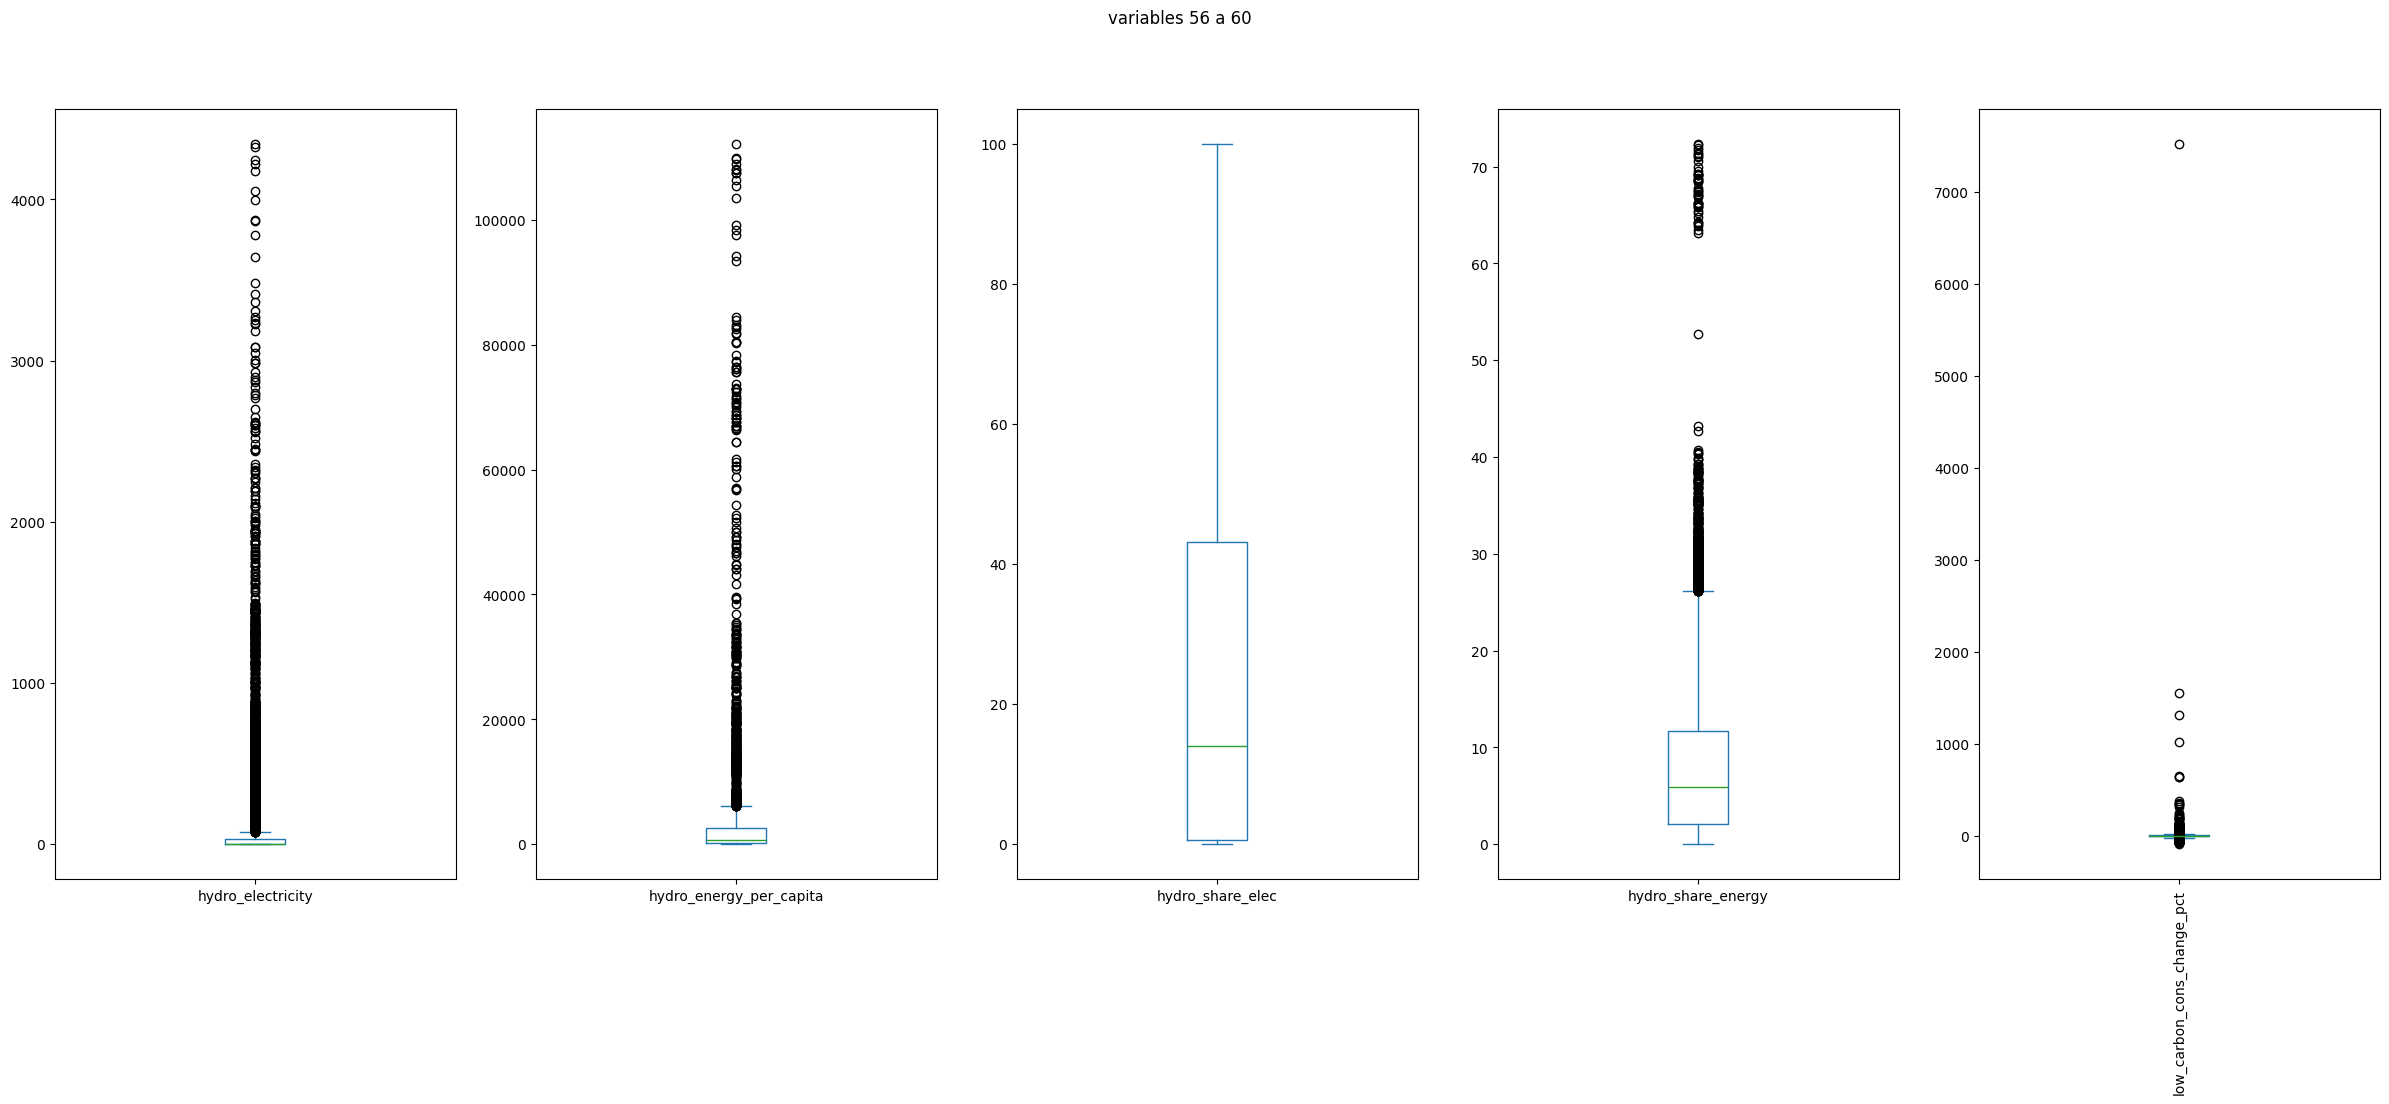

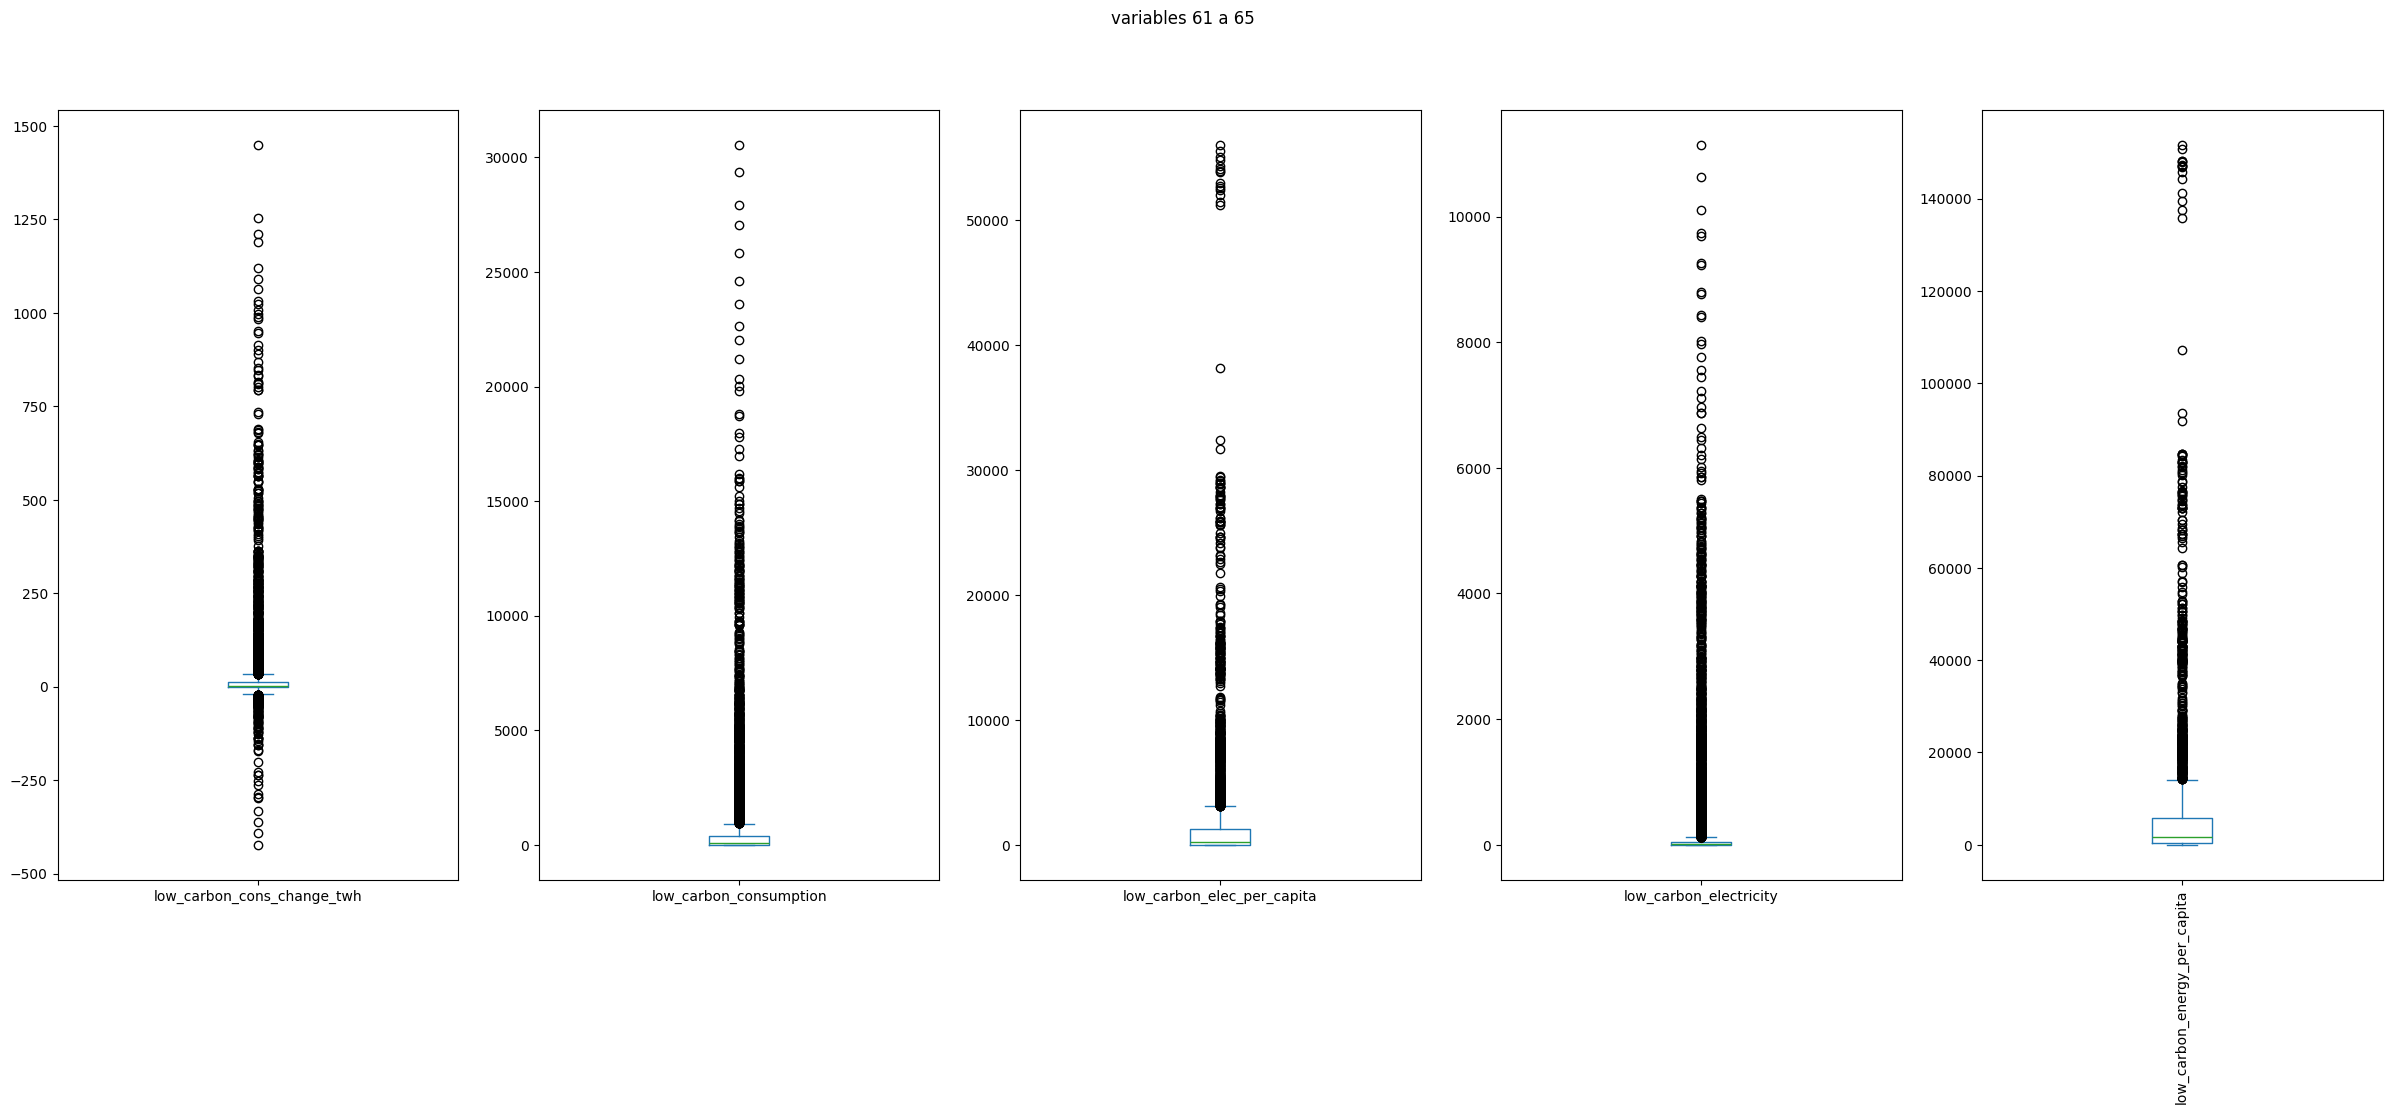

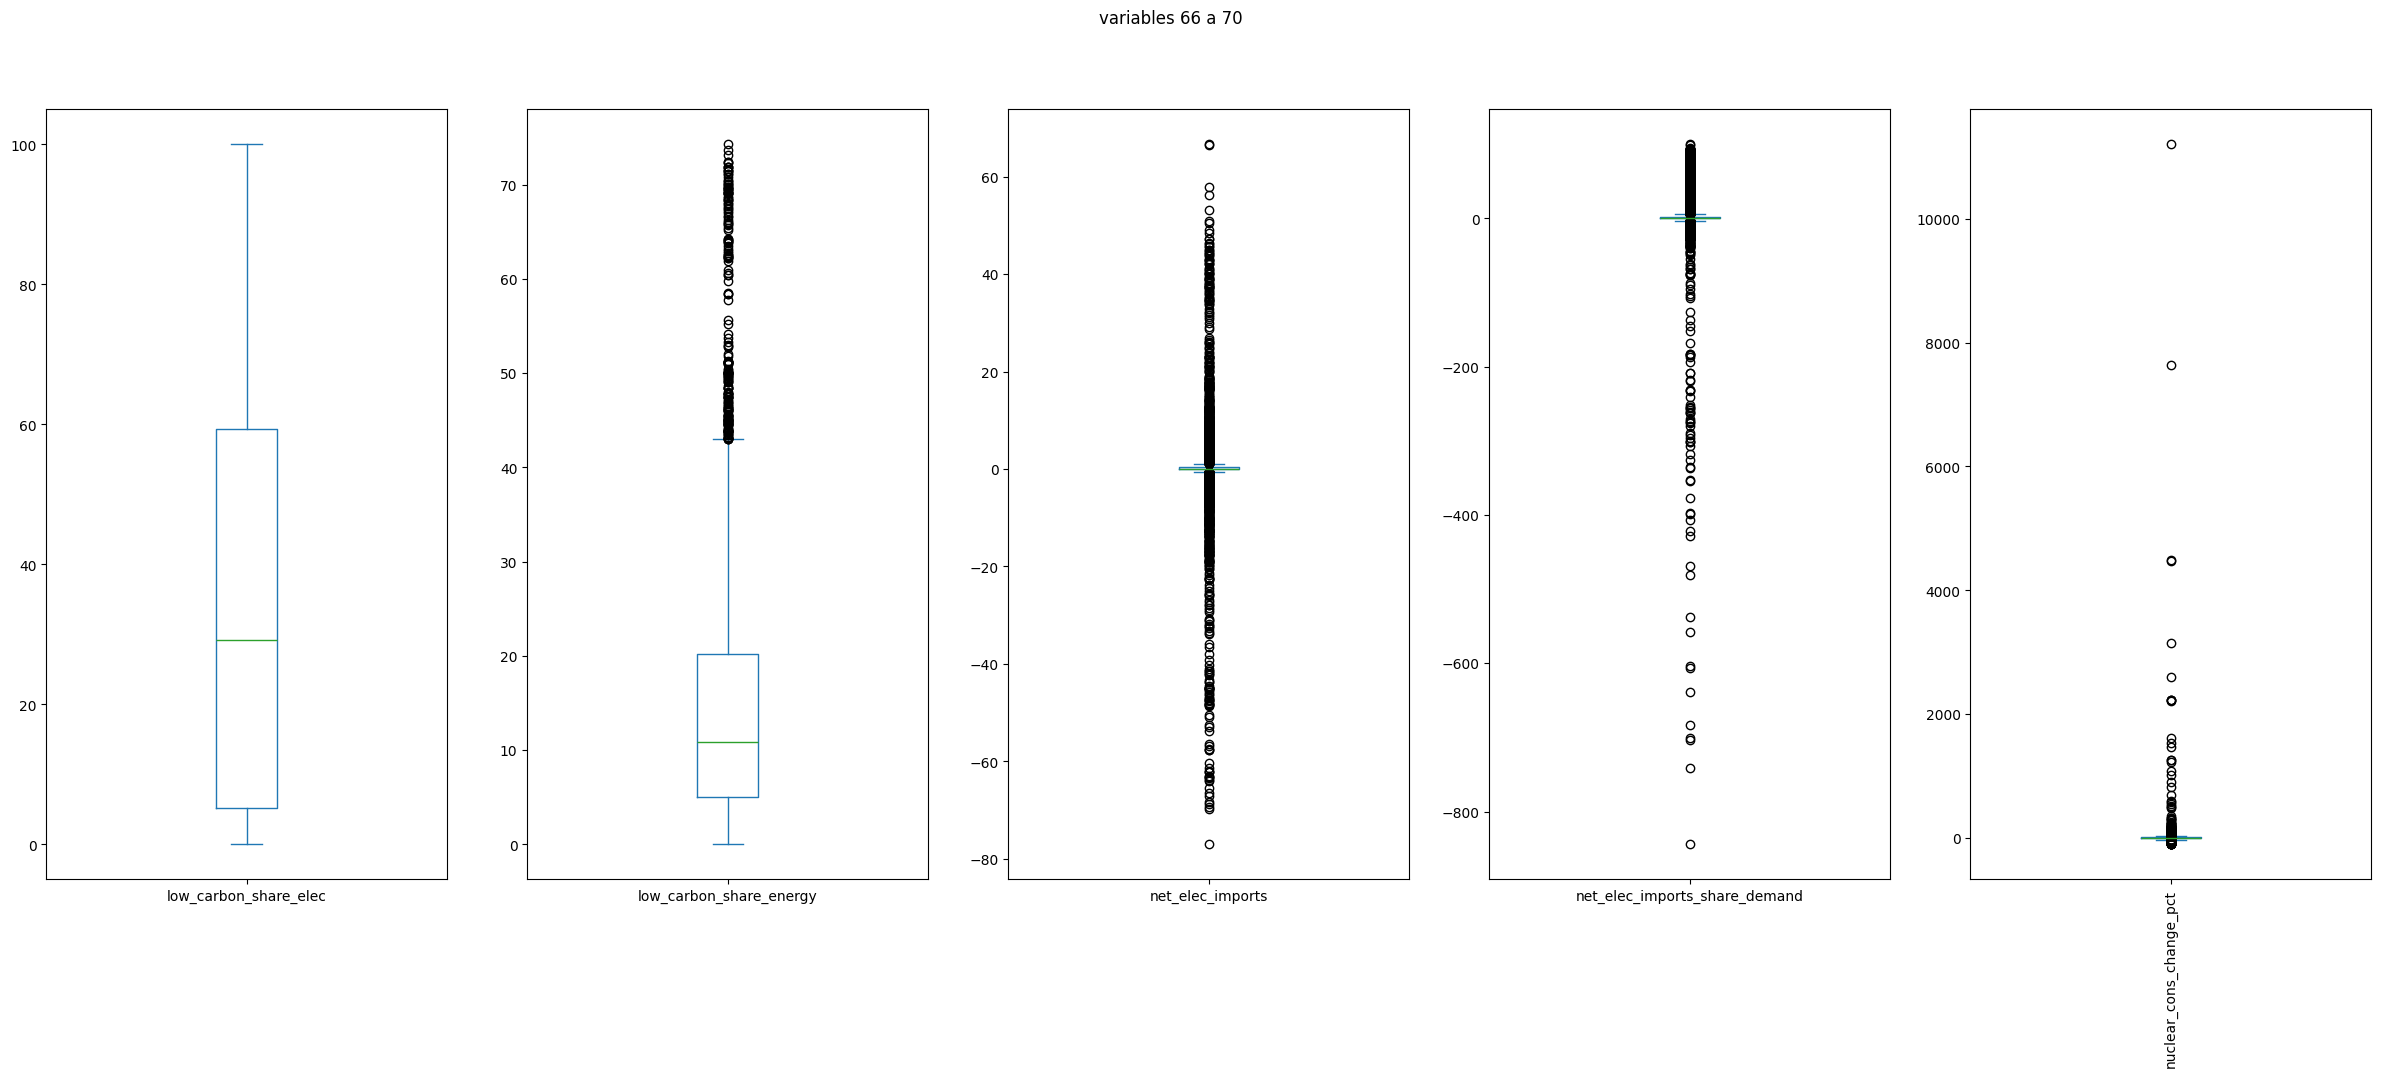

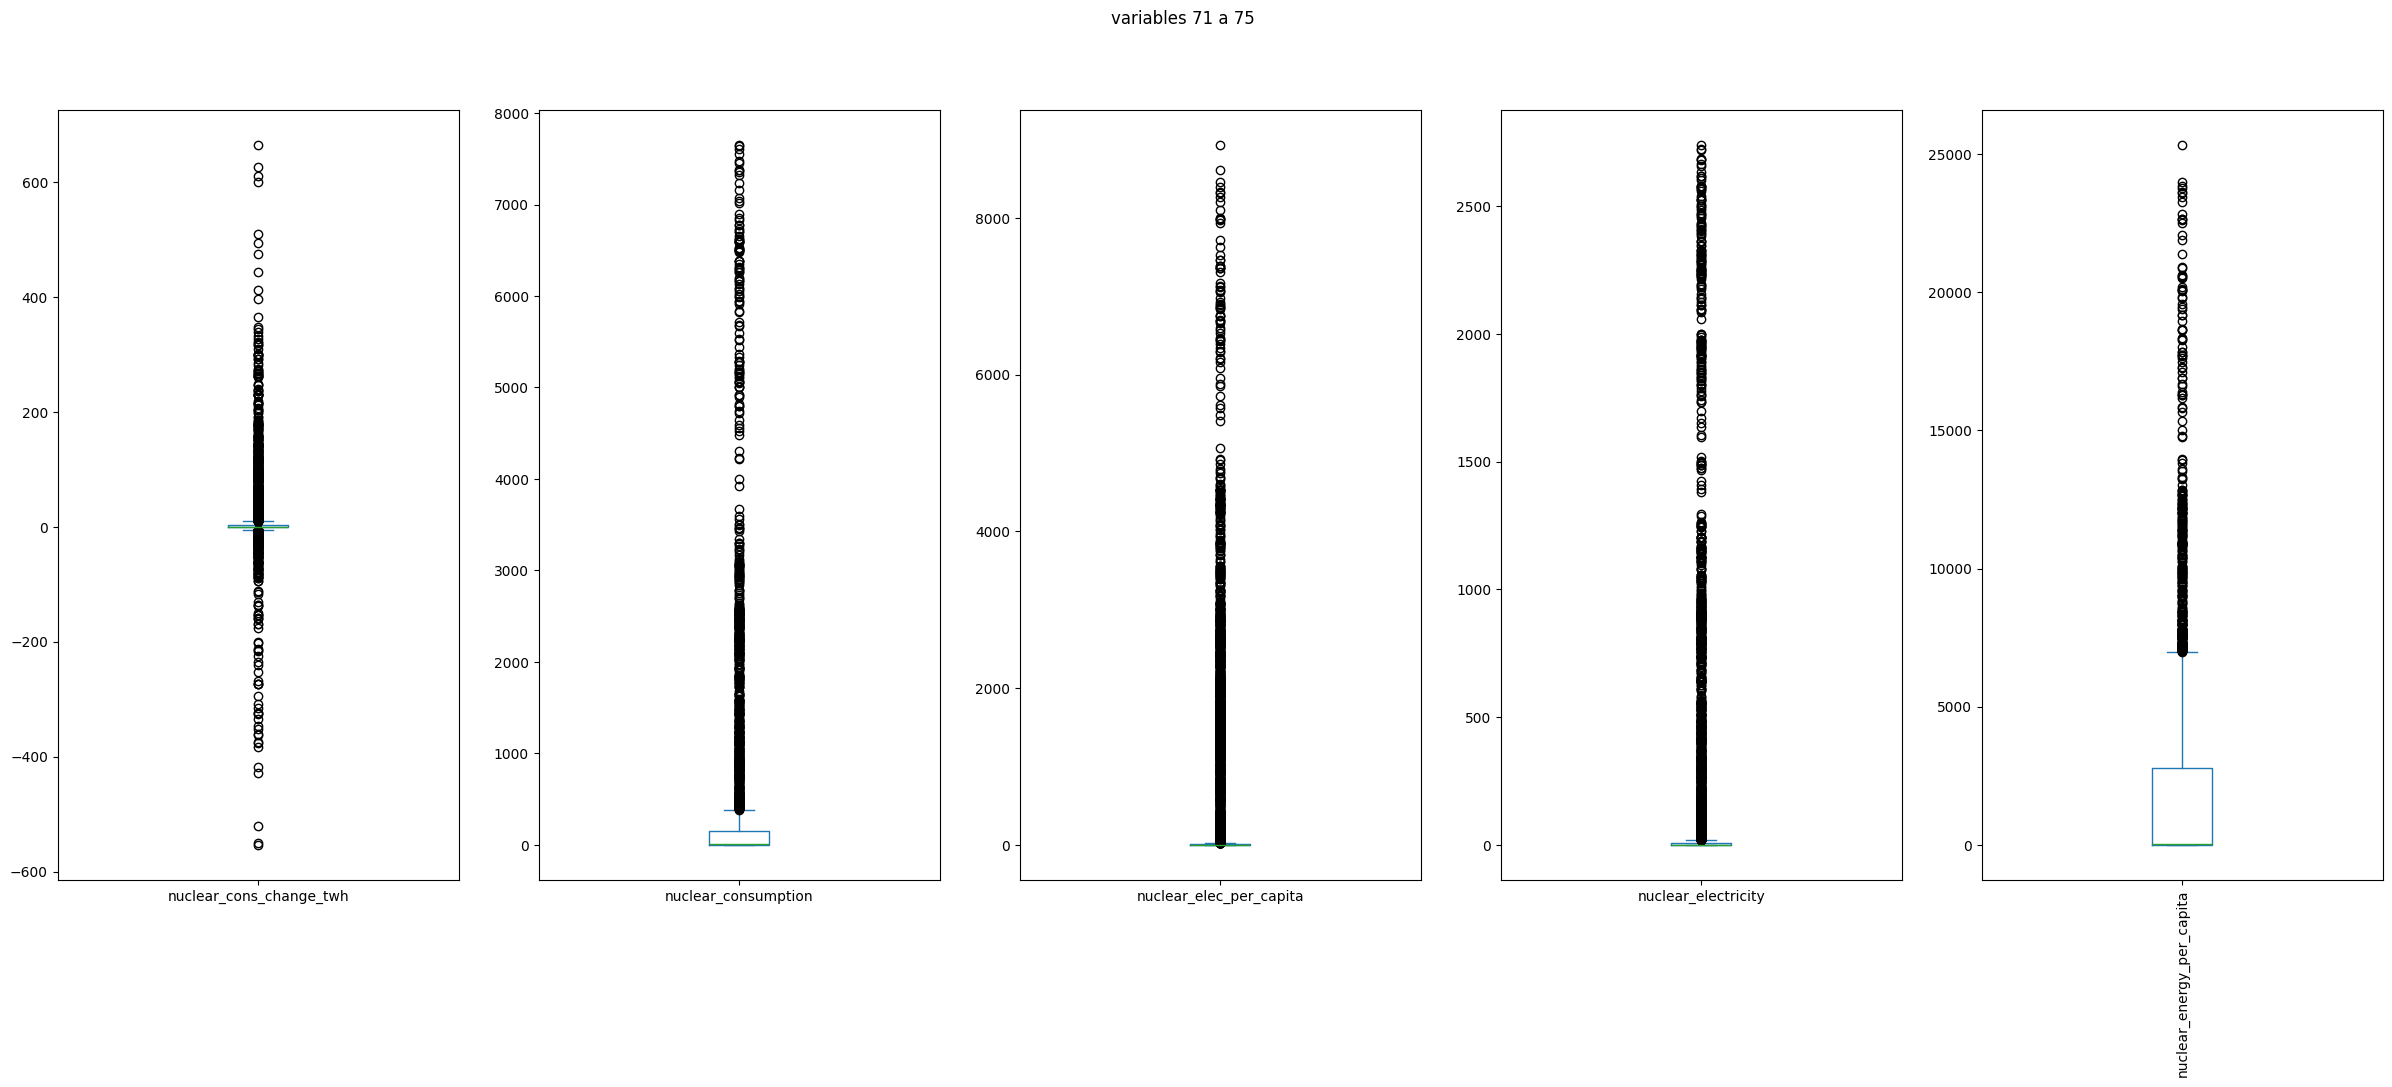

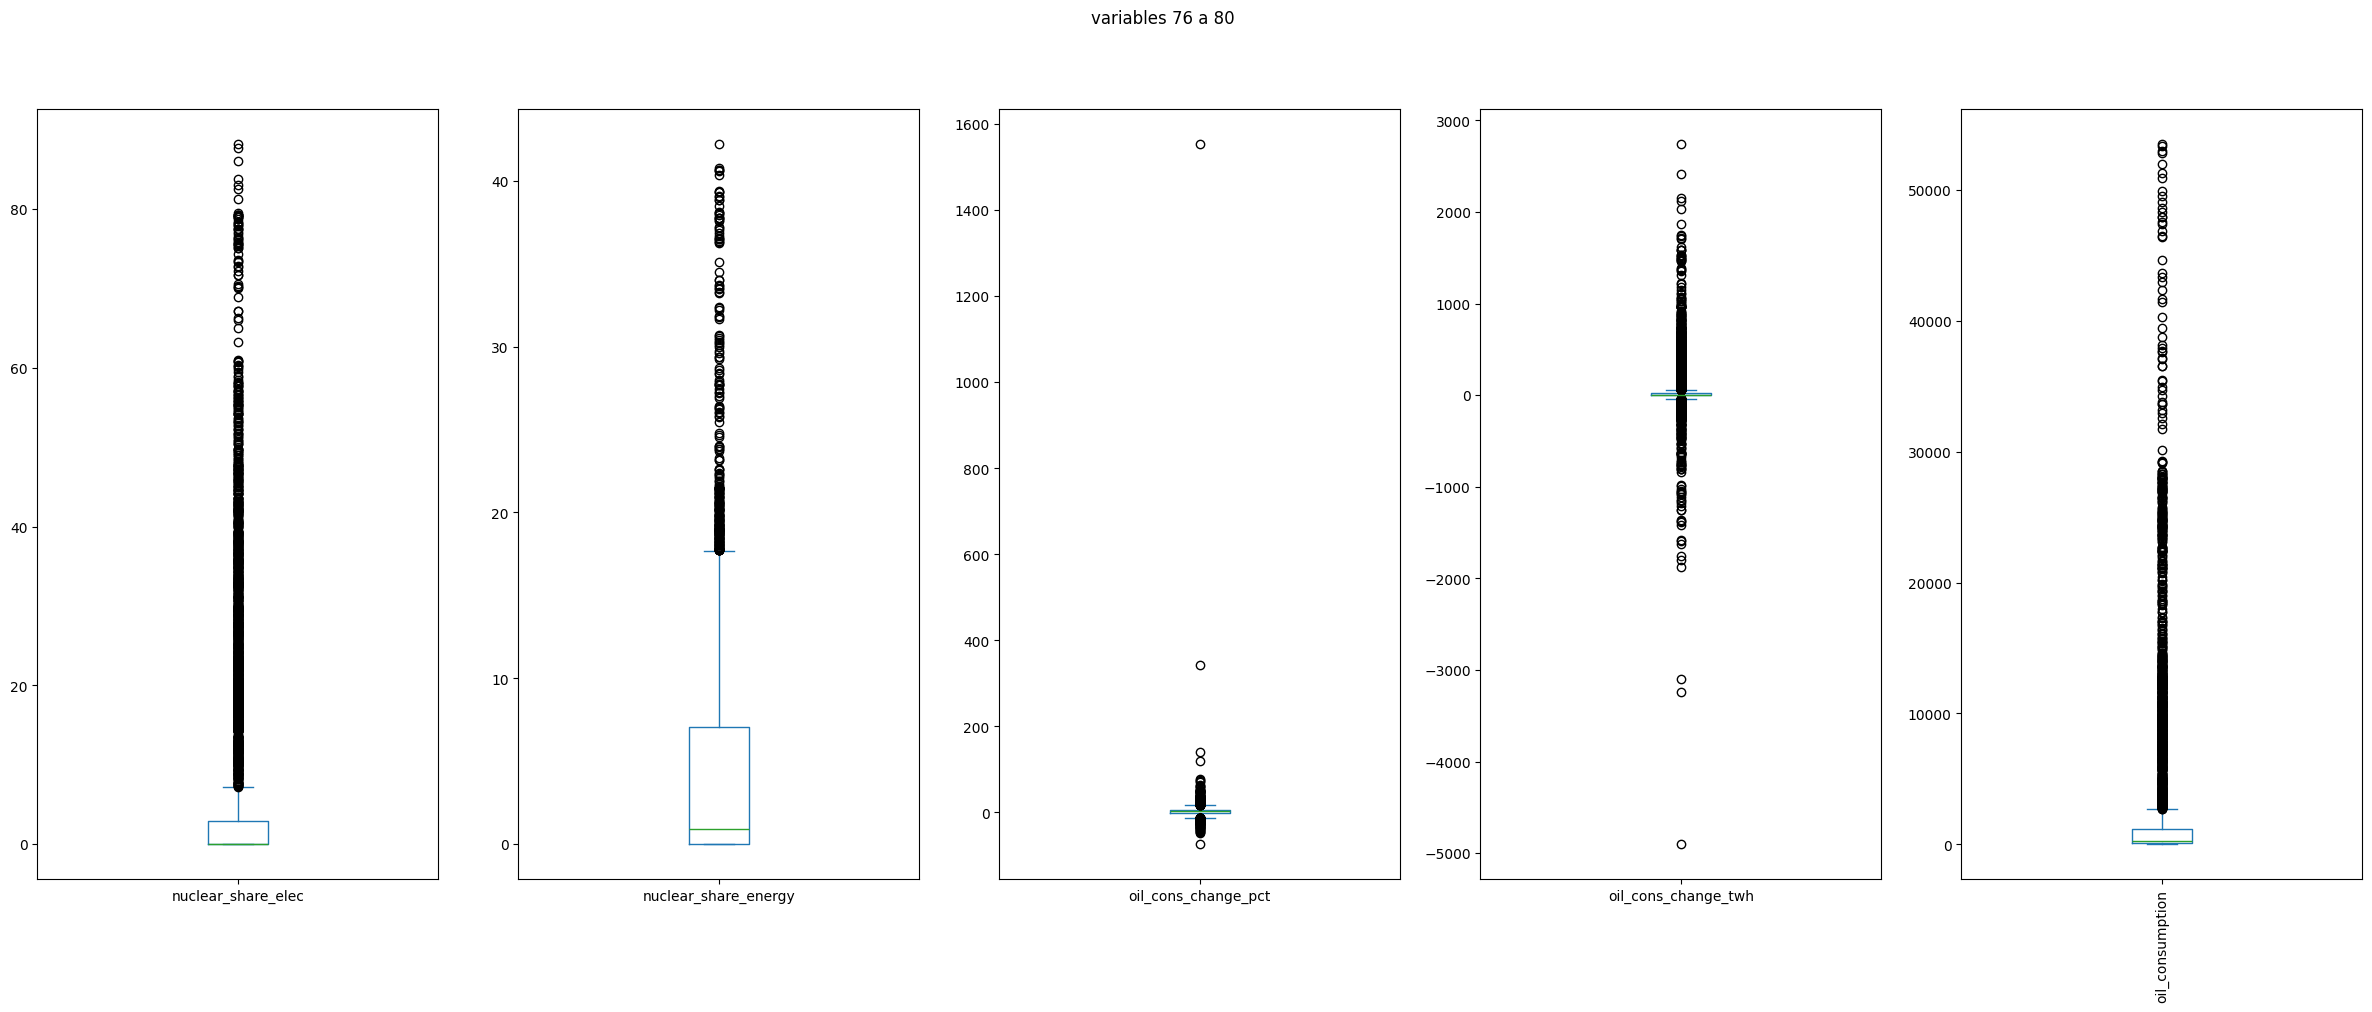

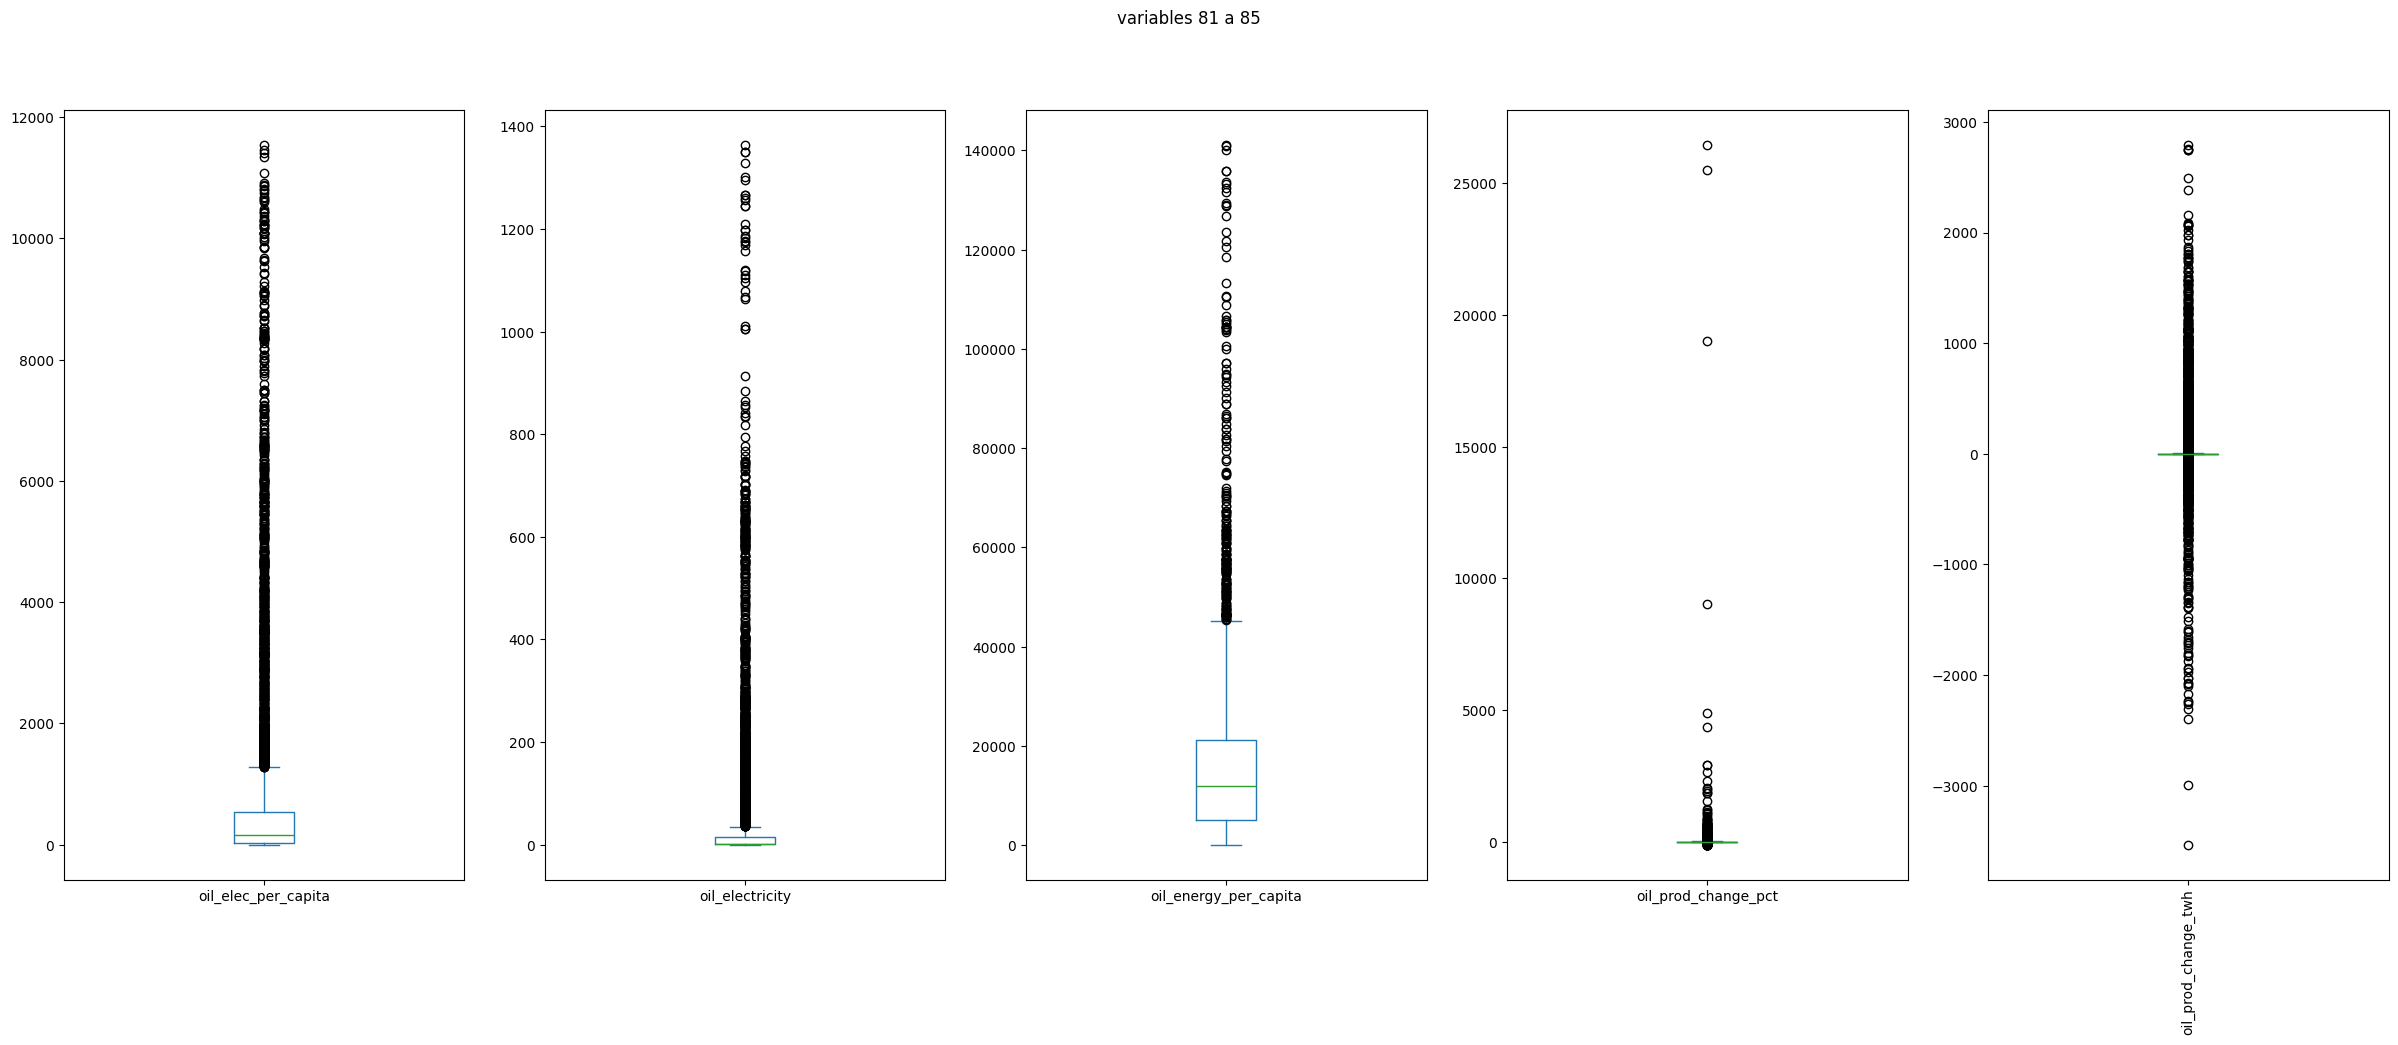

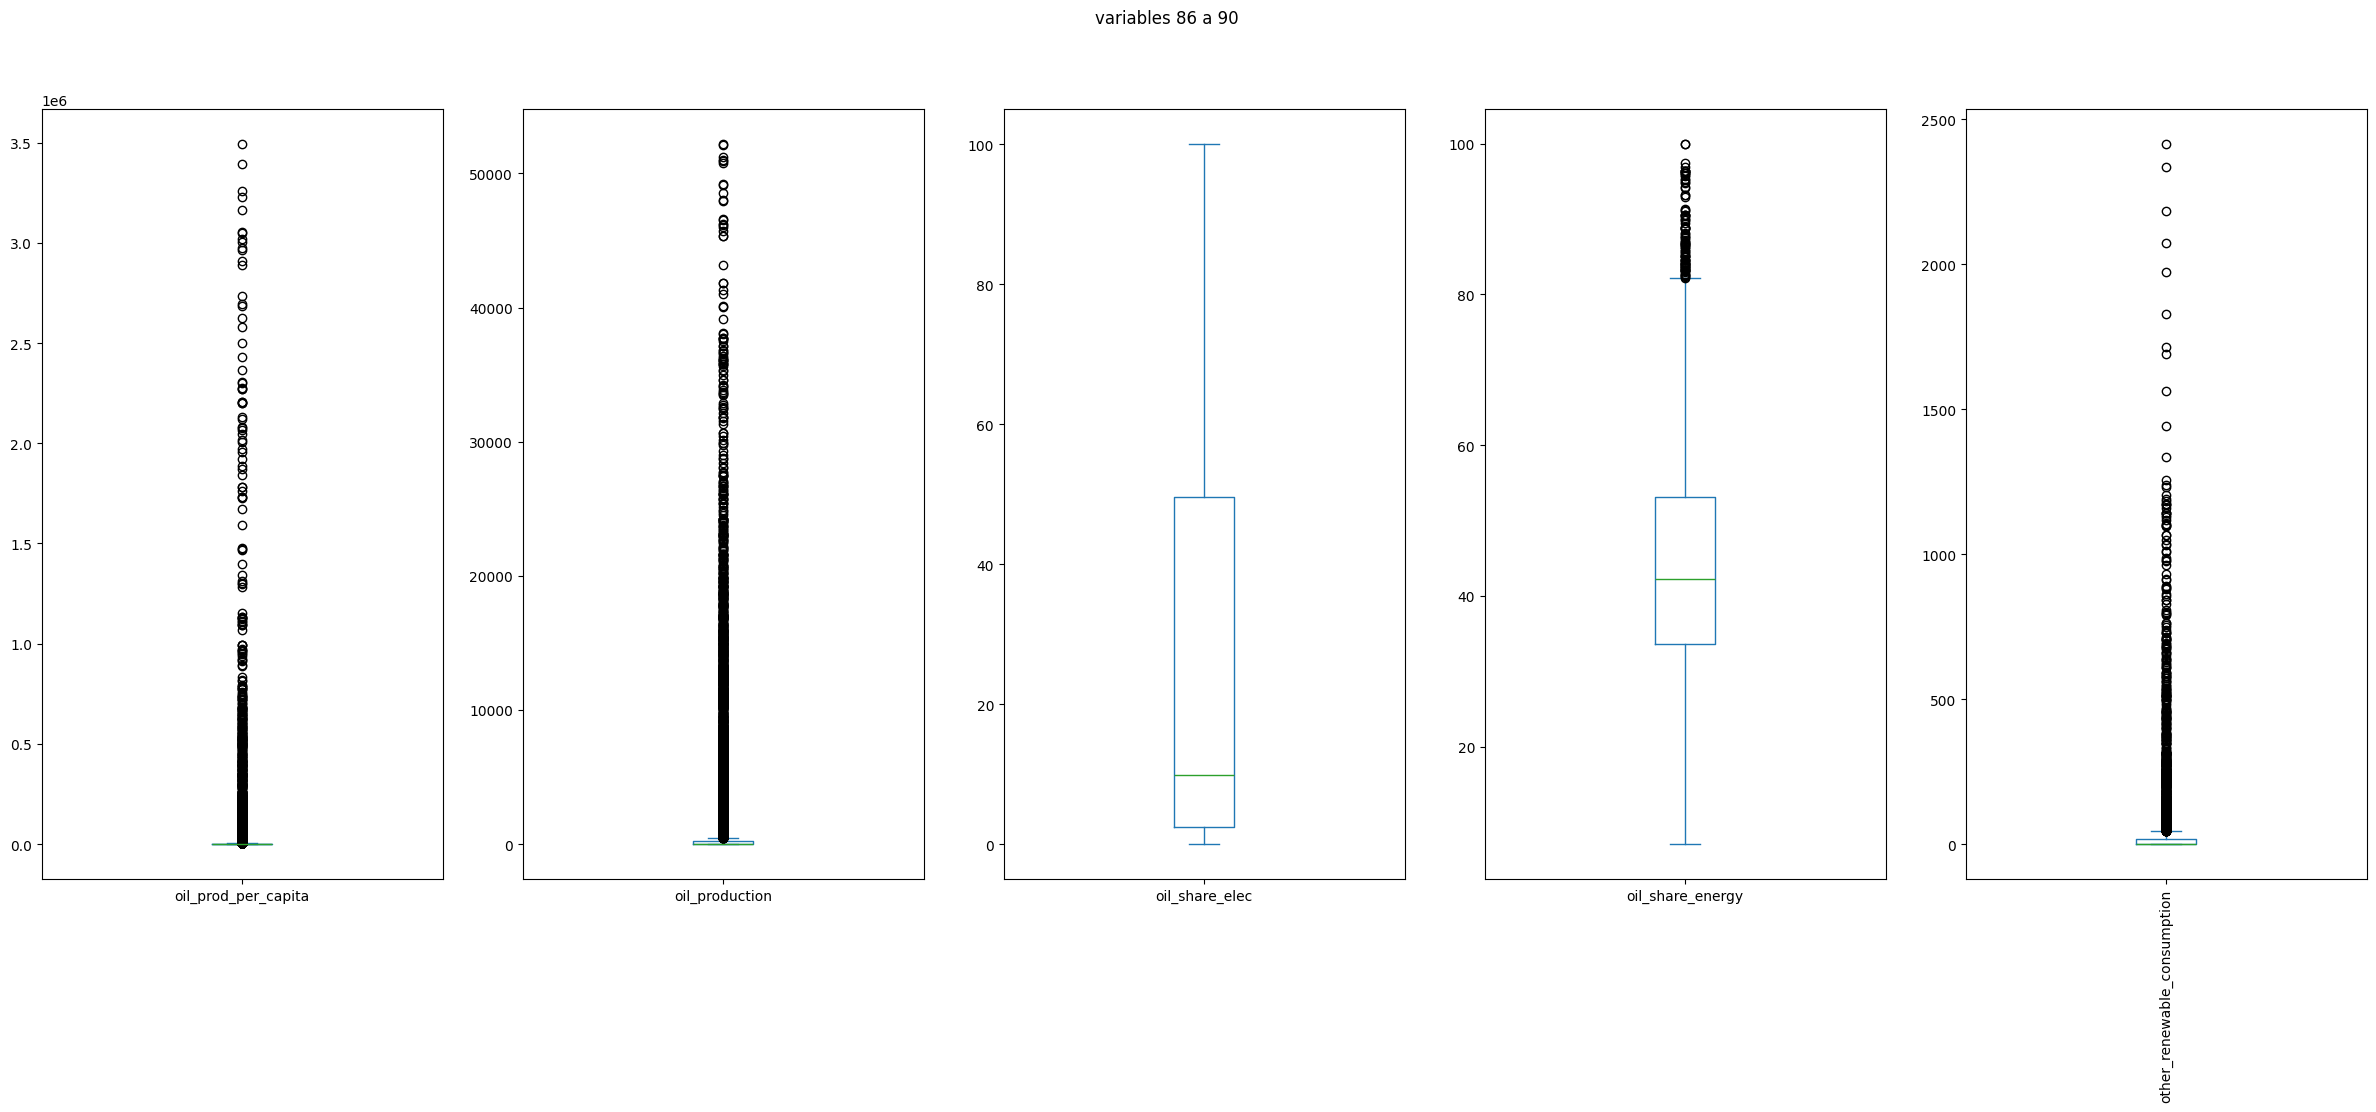

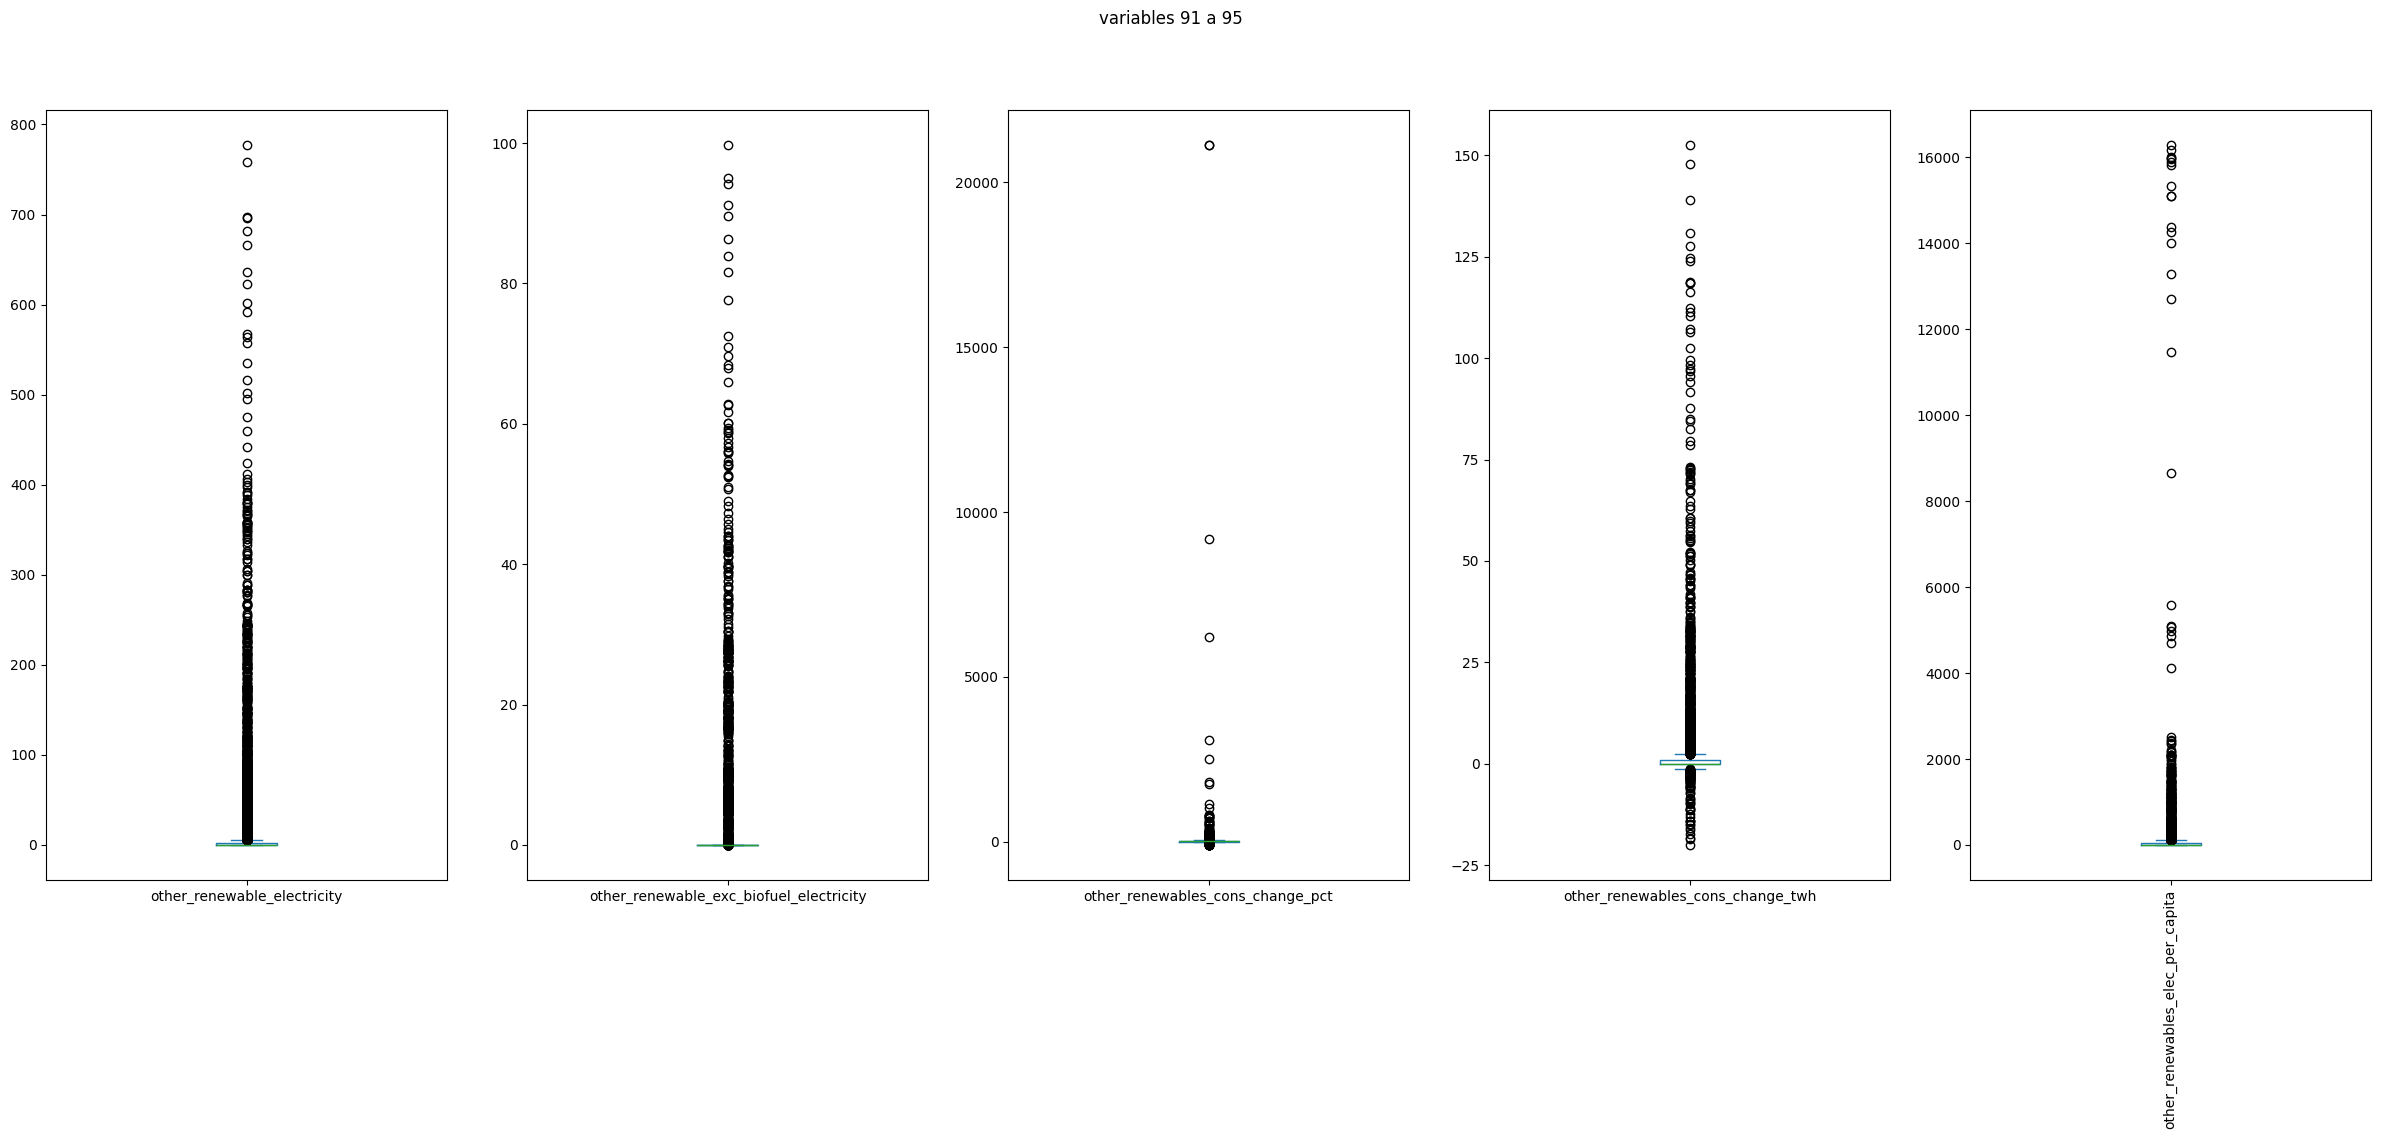

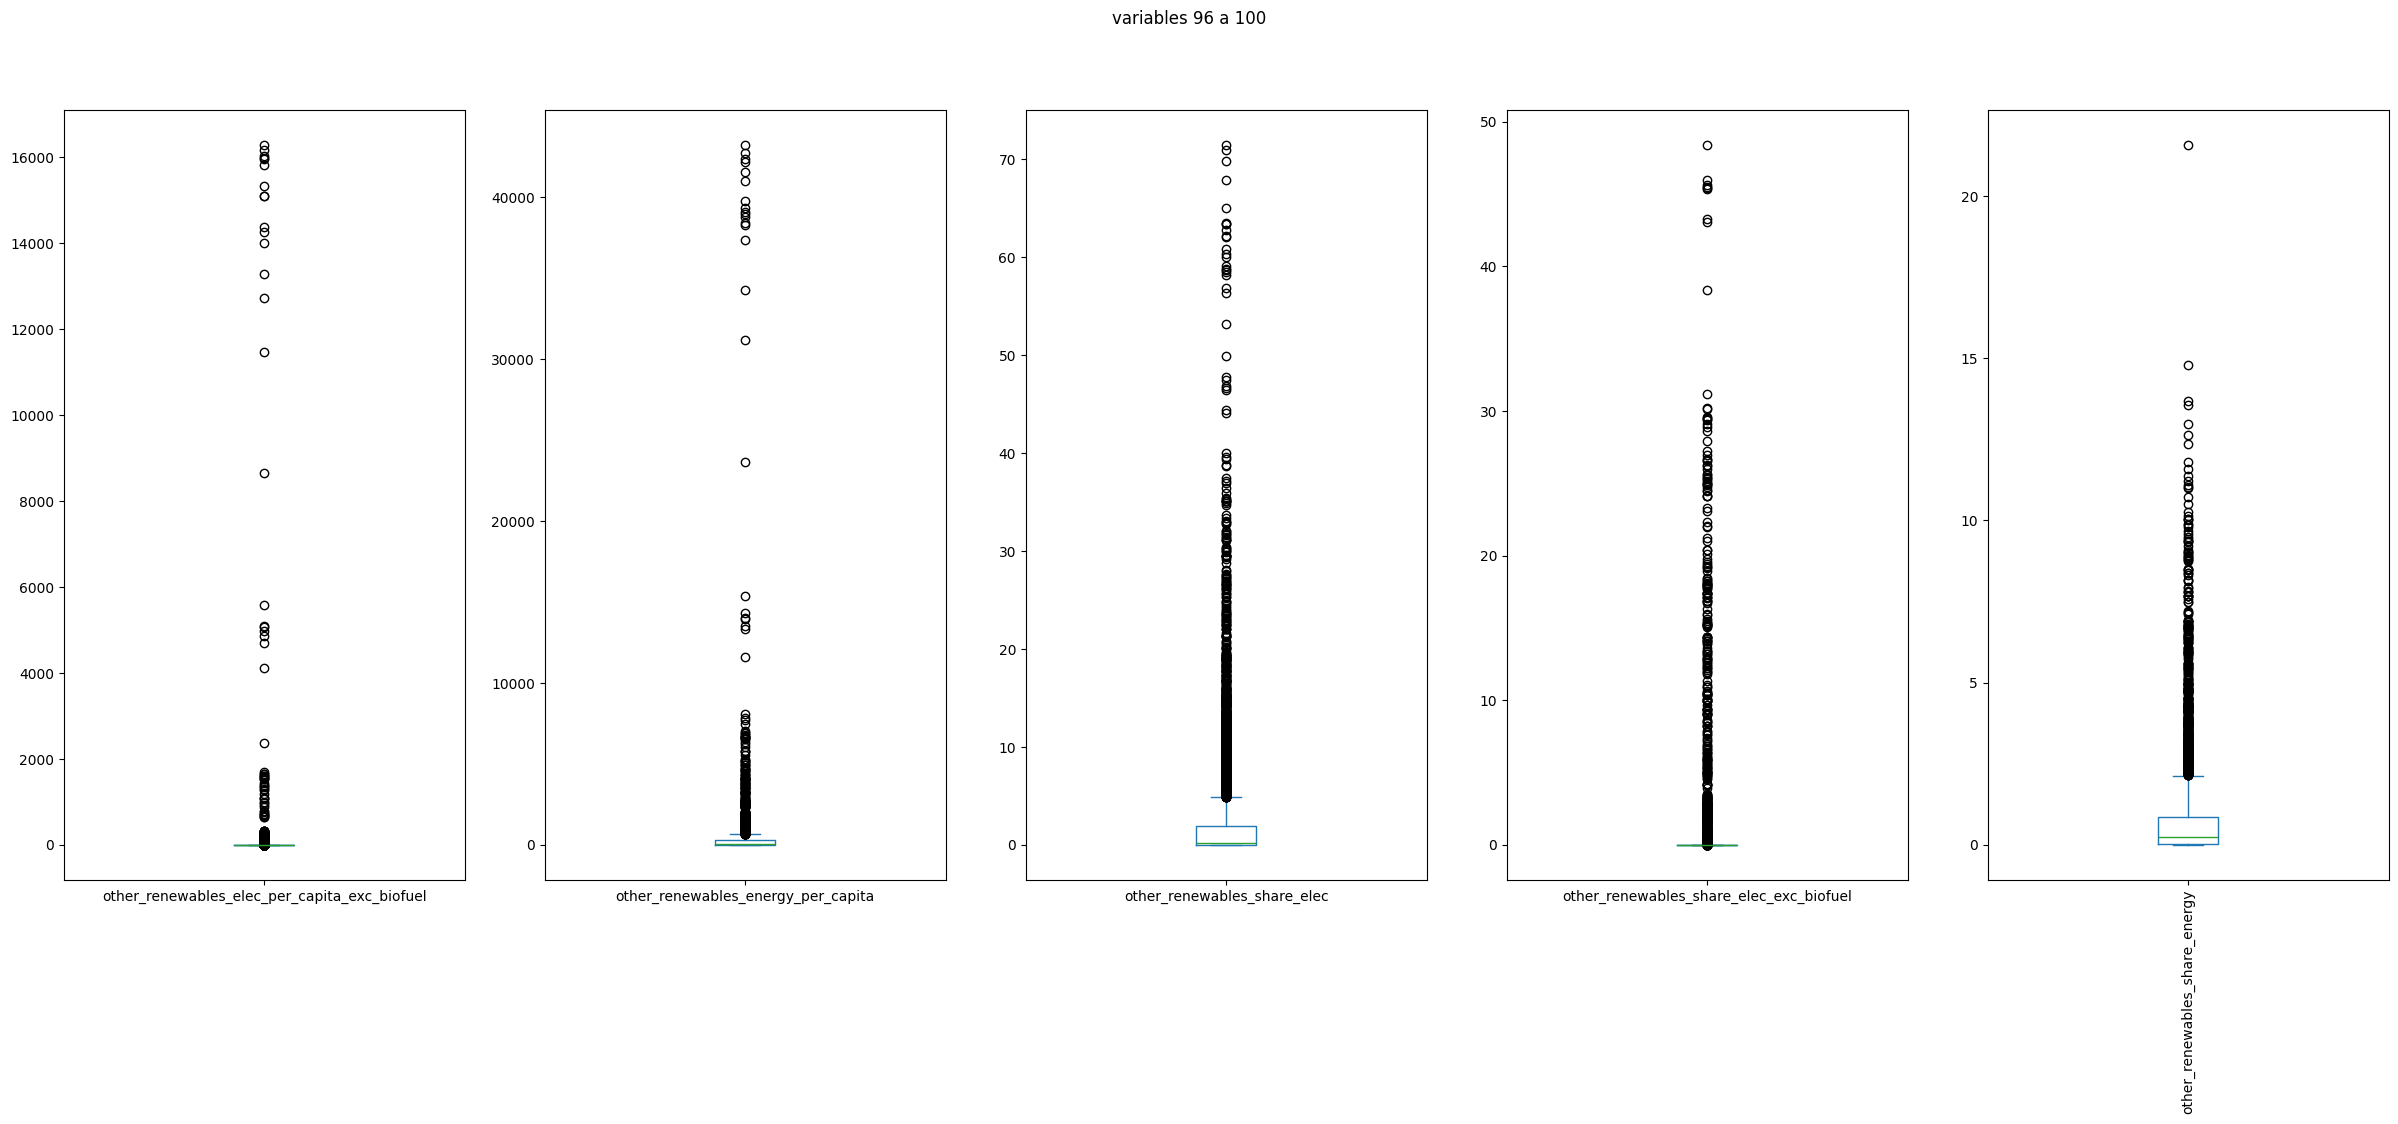

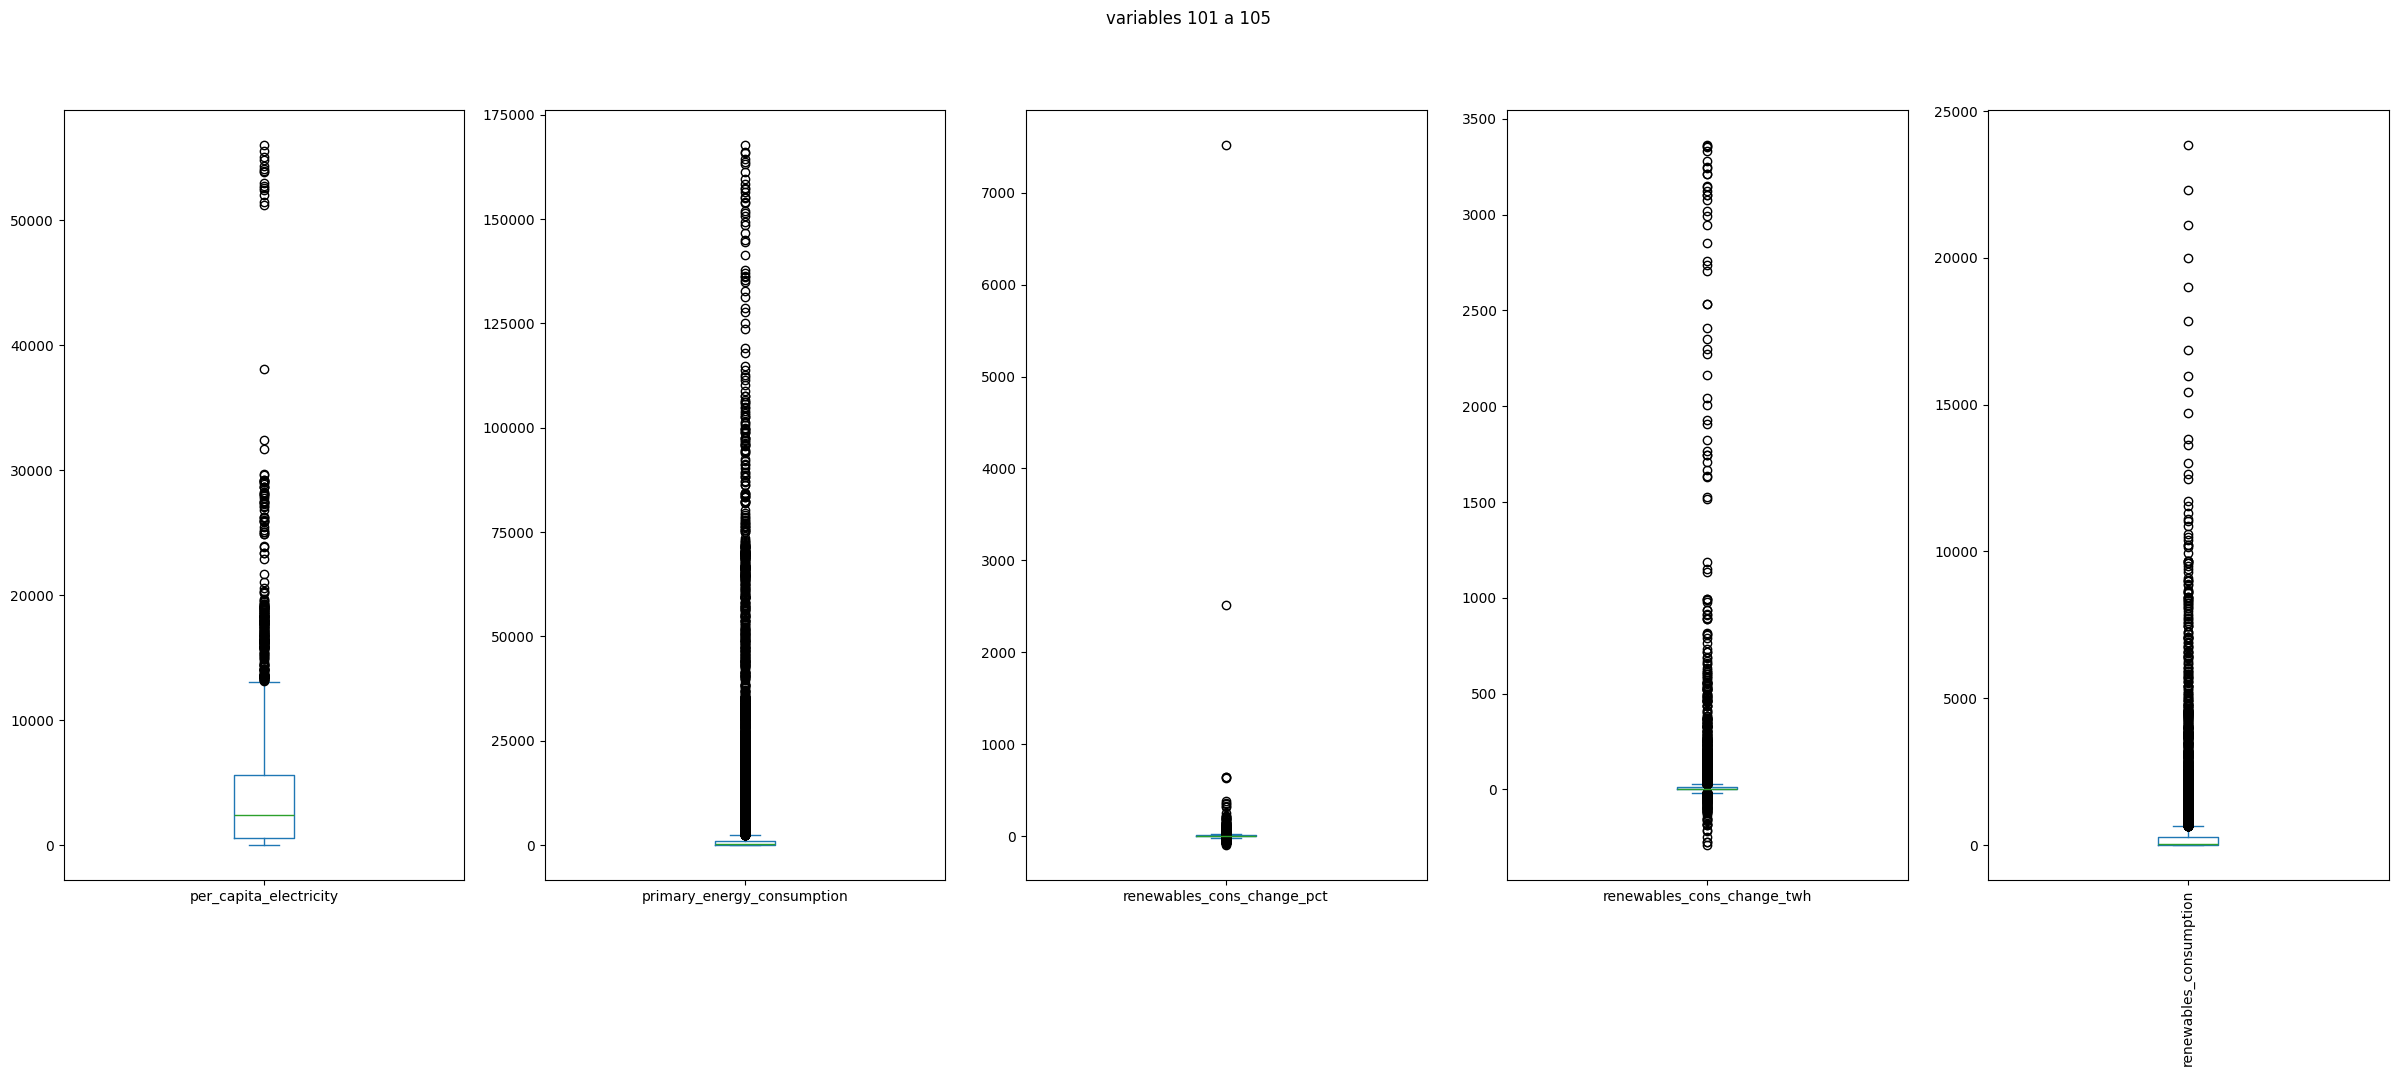

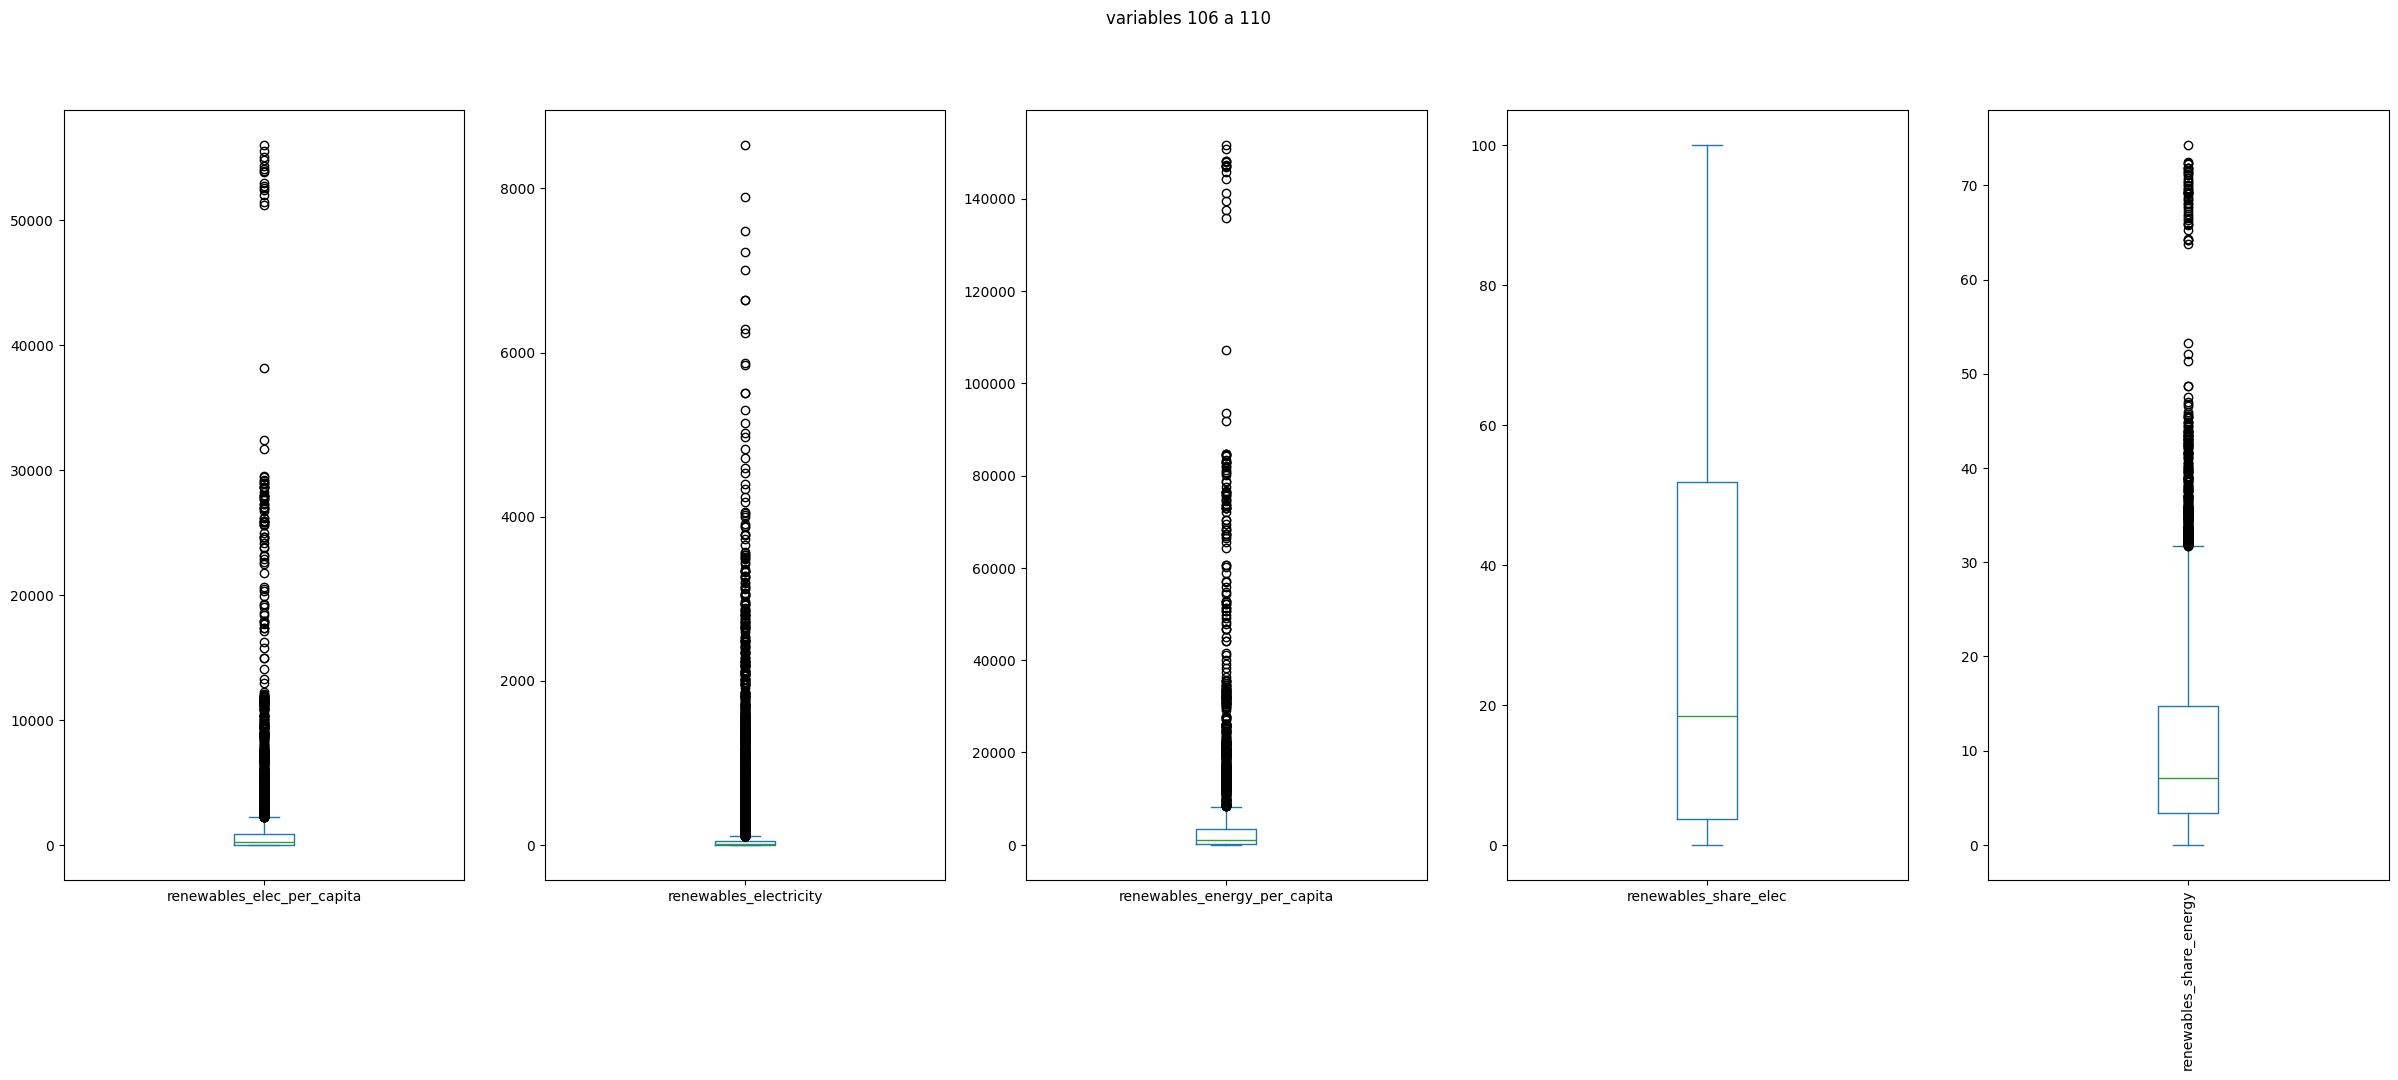

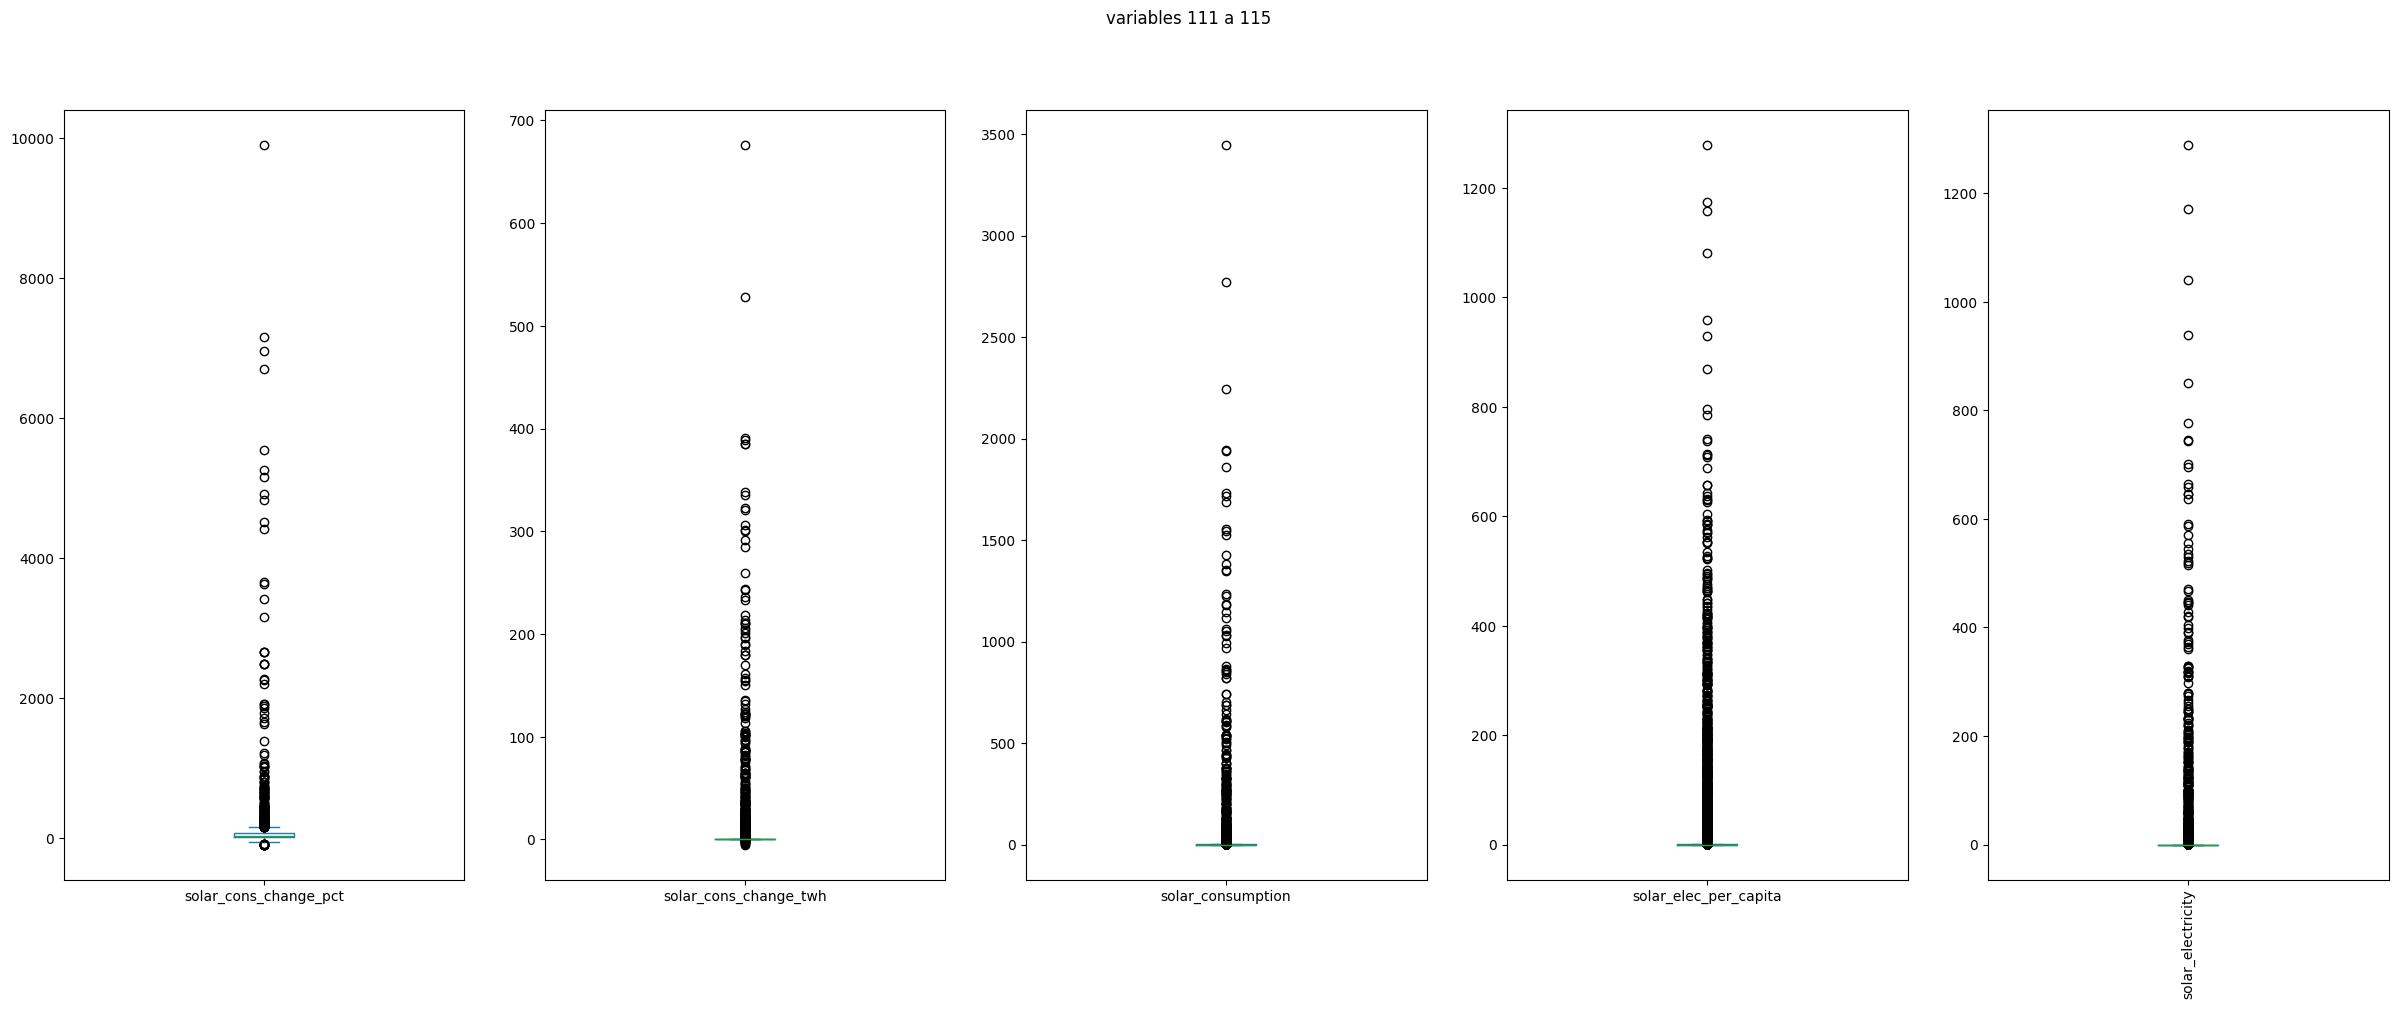

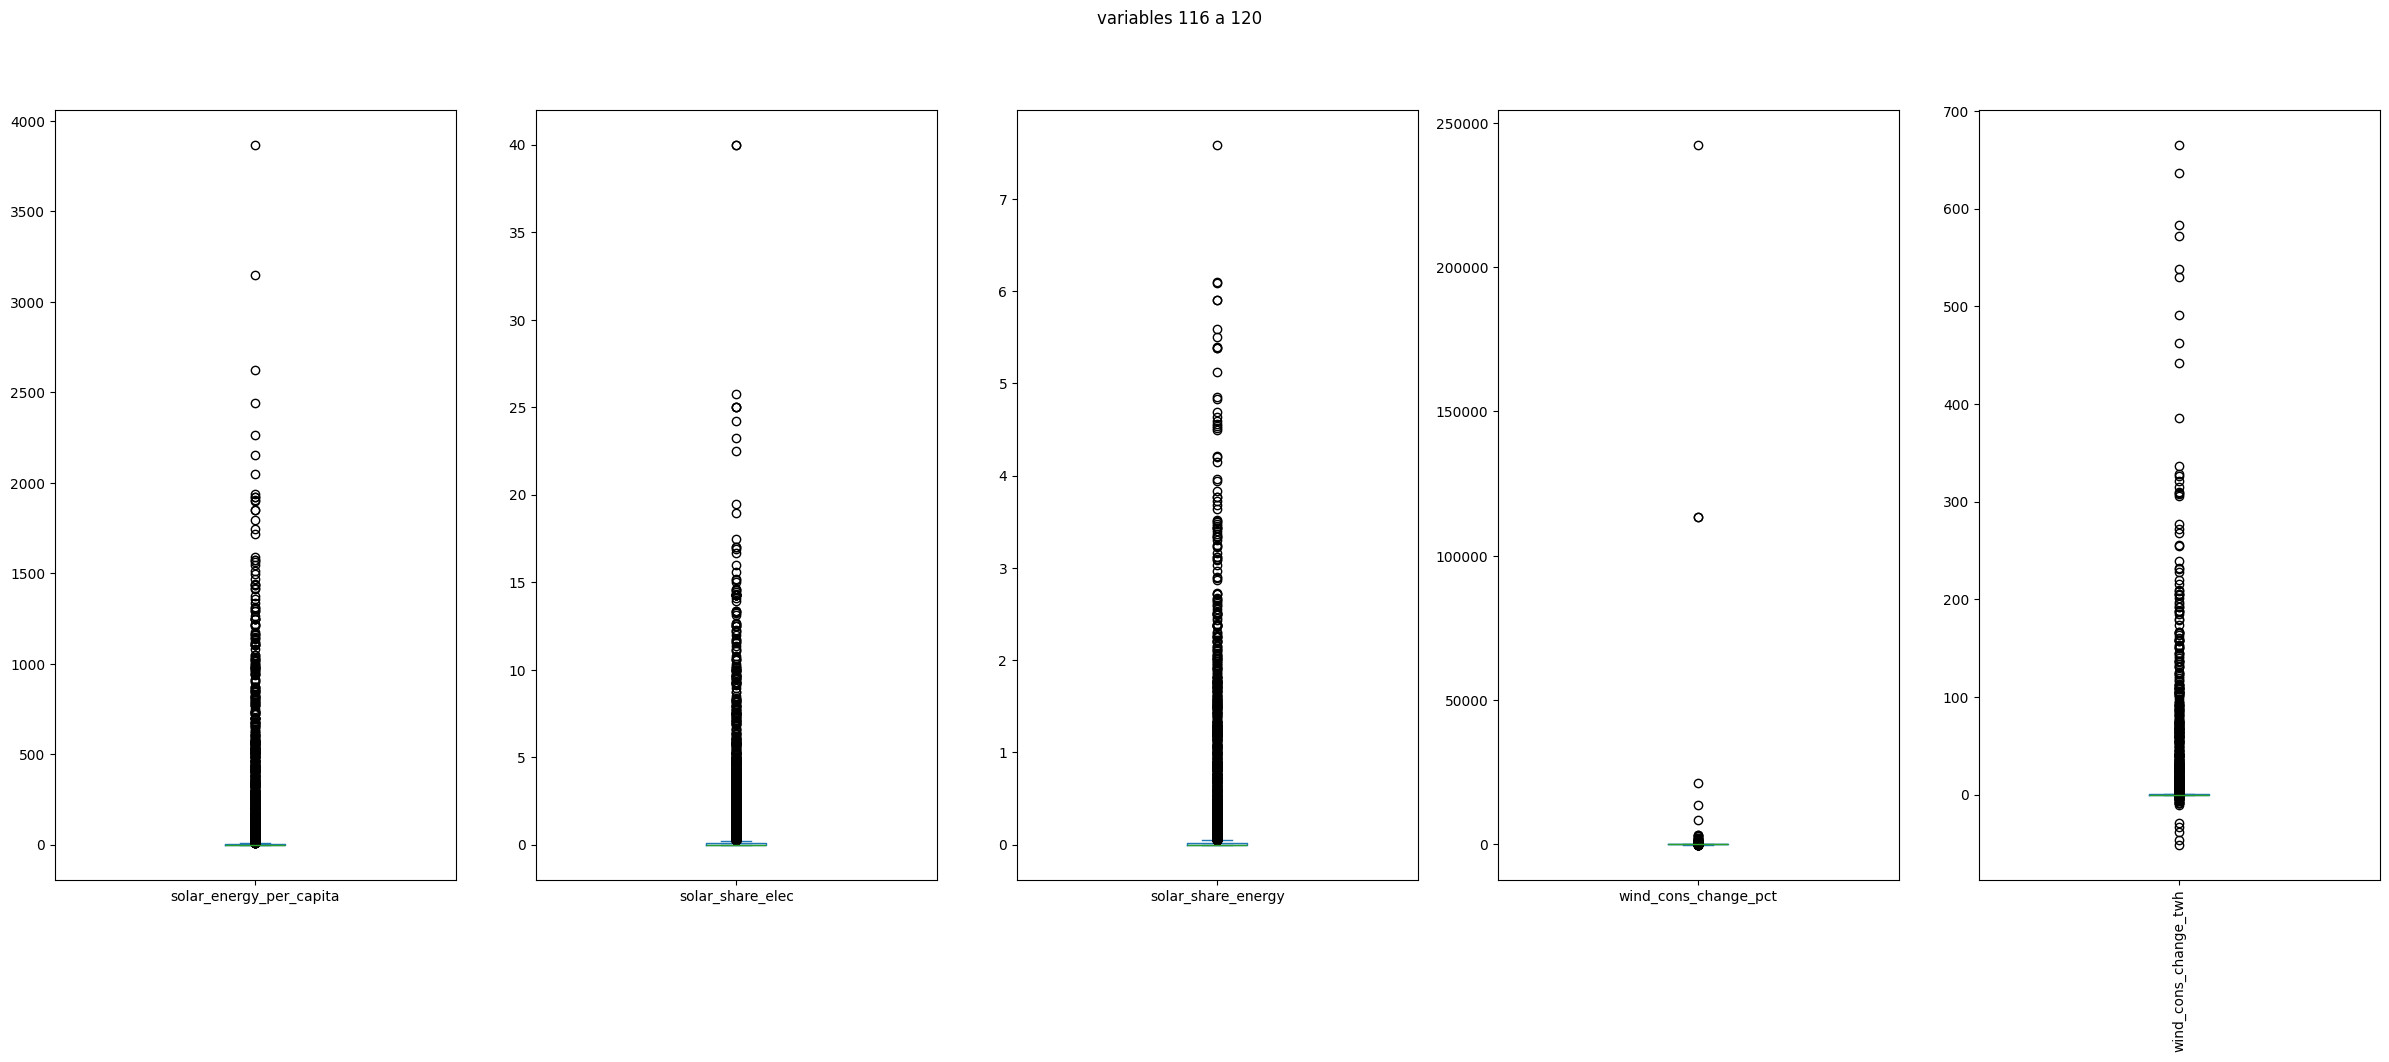

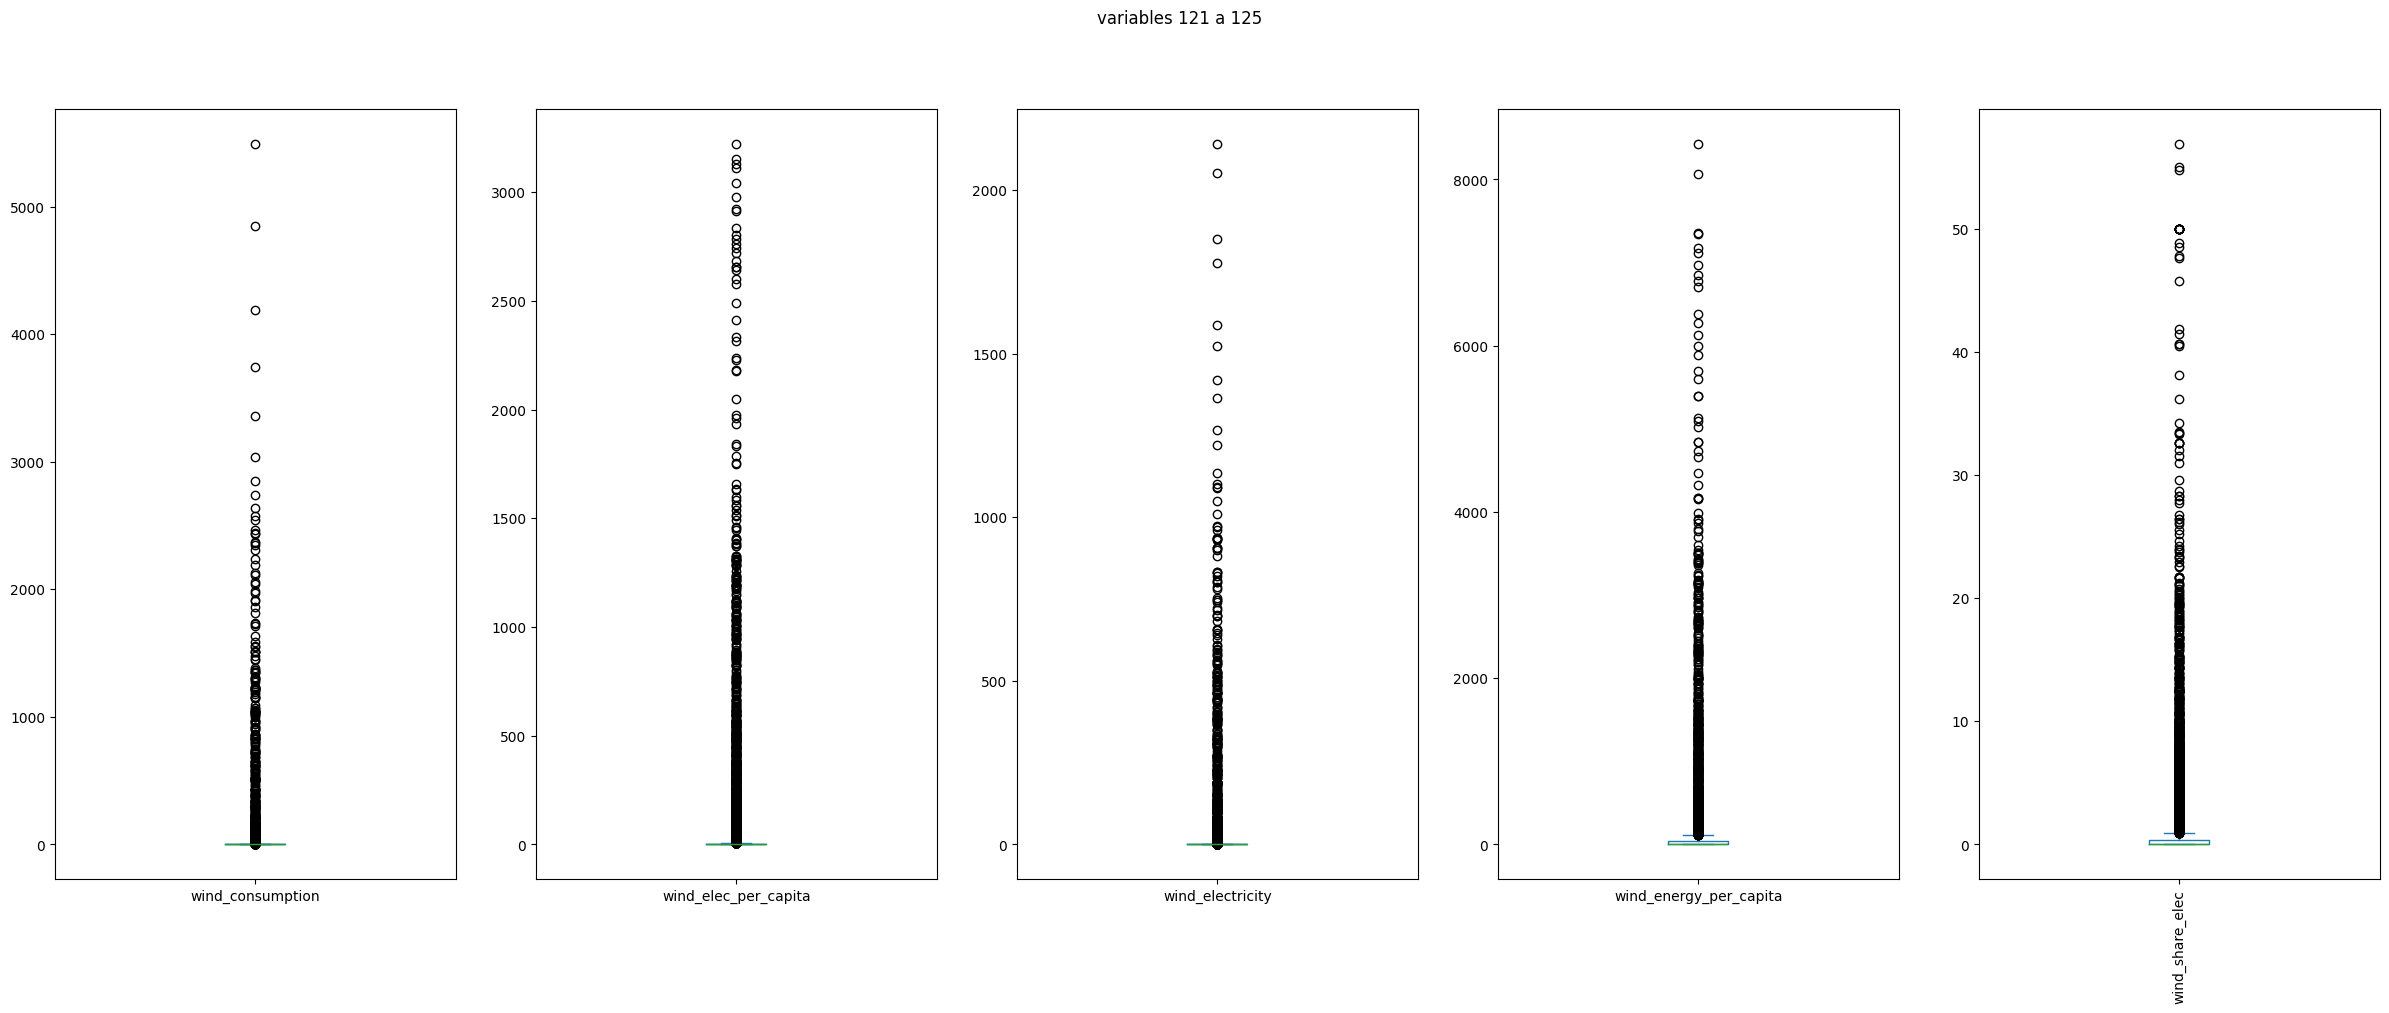

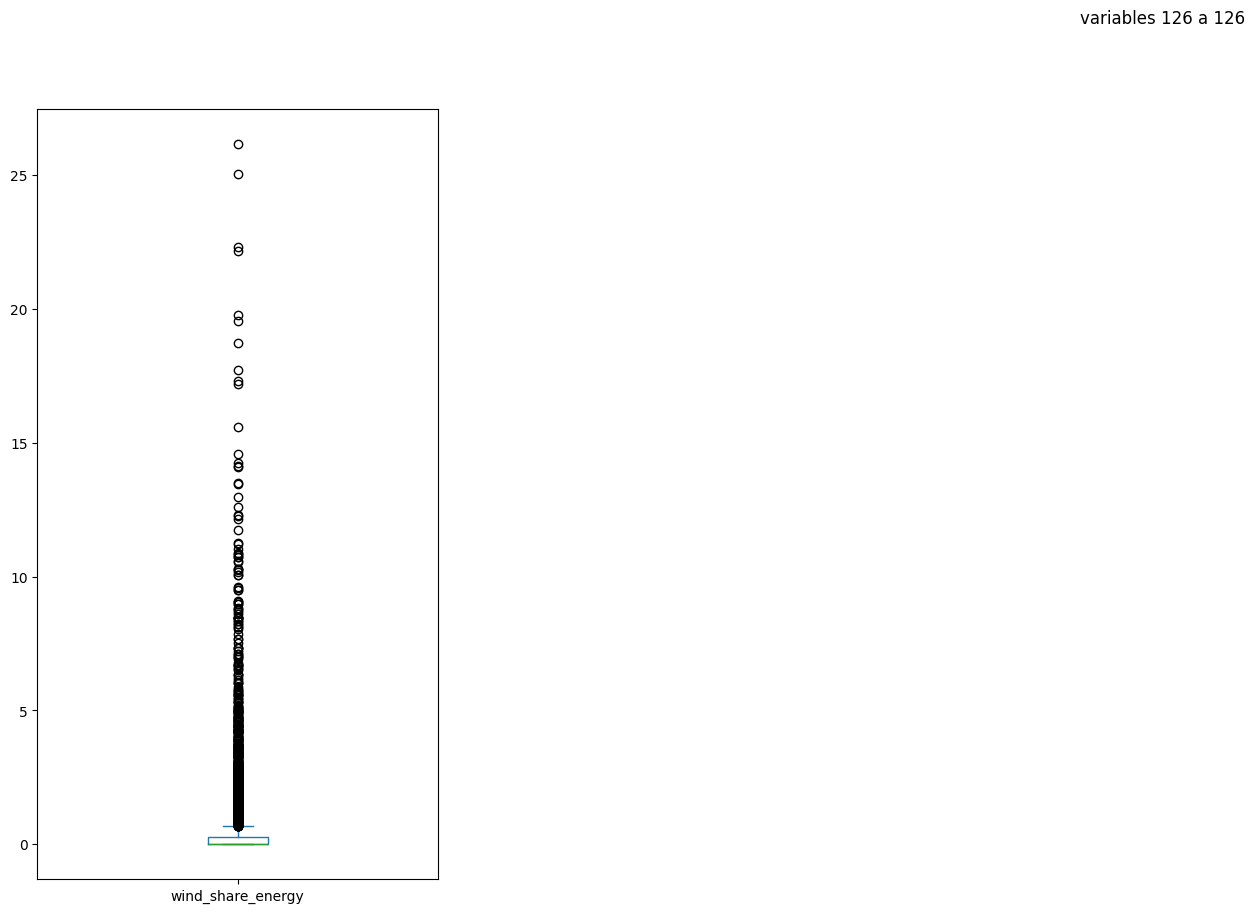

In [8]:
# verificamos las distribuciones de los datos

#columnas numéricas
num_cols=df.select_dtypes(include='number').columns
# tamaño de la lote
batch_size=5

for i in range(0,len(num_cols),batch_size):
    cols_batch=num_cols[i:i+batch_size]
    df[cols_batch].plot(kind='box',subplots=True,layout=(1,batch_size), figsize=(30,10), sharex=False)
    plt.suptitle(f'variables {i+1} a {i+len(cols_batch)}')
    plt.xticks(rotation=90)
    plt.show()

In [25]:
#altas asimetrías
df.select_dtypes(include='number').skew()
print(f'número de variables con alta asimetría {((df.select_dtypes(include='number').skew()>0.85)|(df.select_dtypes(include='number').skew()<-0.85)).sum()}')


número de variables con alta asimetría 120


In [34]:
#Verificamos los duplicados, nulos y atipicos
#número de duplicados 
df.duplicated().sum()
# no hay presencia de duplicados
#verificación de nulos por columna
print(f' cantidad de nulos por columnas \n {df.isna().sum()}\n')
#verificación de nulos por filas
print(f'cantidad de filas al menos un nulo \n{(df.isna().any(axis=1)).sum()}')
#verificación de filas con alta proporción de nulos
print(f'cantidad de filas con un más del 50% del \n{(((df.isna().sum(axis=1))/df.shape[1])>0.5).sum()}')

 cantidad de nulos por columnas 
 country                       0
year                          0
iso_code                   5458
population                 3847
gdp                       10899
                          ...  
wind_elec_per_capita      14947
wind_electricity          14016
wind_energy_per_capita    17947
wind_share_elec           15126
wind_share_energy         17911
Length: 129, dtype: int64

cantidad de filas al menos un nulo 
21818
cantidad de filas con un más del 50% del 
15748


In [ ]:
#limpieza de atipicos
#Rango intercuartilico 
variables_numéricas=df